# Car Price Assignment - (Geely Auto) - Linear Regression
by Saiyana Ramisetty

**Geely Auto** is a Chinese automobile company which aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market.

**Goal of the Assignment:**
- Which variables are significant in predicting the price of a car.
- How well those variables describe the price of a car.
- Model the price of cars with the available independent variables. It will be used by the mamagement to understand how exactly the prices vary with the independent variables. So that they can accordingly manipulate the design of the cars, the business strategy etc...  to meet certain price levels.

This analysis can help the management to understand the pricing dynamics of a new market.

## Importing Libraries need for the model building and analysis 

In [1]:
import numpy as np
import pandas as pd

# Plots
import matplotlib.pyplot as plt
import seaborn as sns

# Stats Model
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

## Loading the dataset
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market. 

In [2]:
# Path variable to hold the specific path of the data
path_var = '' # Replace with correct path variable

# Loading dataset
data = pd.read_csv(path_var + 'CarPrice_Assignment.csv', encoding = 'ISO-8859-1')
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Understanding the dataset and it's attributes 

In [3]:
data.shape

(205, 26)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [5]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
data.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

Car ID can be dropped from the dataset as it doesn't add any value in understanding the car features.

In [7]:
data.drop(['car_ID'], axis = 1, inplace = True)

## Data Visualisation of numeric attributes 
Gathering all the numeric attributes and understanding their behaviour with the car price.

In [8]:
# Getting only numeric attributes from the data
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_data = data.select_dtypes(include = numerics)
numeric_data

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [9]:
# Extracting the price column to visualize the data using pairplots
price_col = numeric_data['price']
numeric_data = numeric_data.drop(columns = ['price'])
numeric_data.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22


In [10]:
numeric_data.shape

(205, 14)

In [11]:
# Splitting the numeric data attributes into chunks as we have more than 10 attributes
num_data1 = pd.concat([price_col, numeric_data.iloc[:, [0,1,2,3]]], axis = 1)
num_data2 = pd.concat([price_col, numeric_data.iloc[:, [4,5,6,7]]], axis = 1)
num_data3 = pd.concat([price_col, numeric_data.iloc[:, [8,9,10,11]]], axis = 1)
num_data4 = pd.concat([price_col, numeric_data.iloc[:, [12,13]]], axis = 1)

<Figure size 1080x576 with 0 Axes>

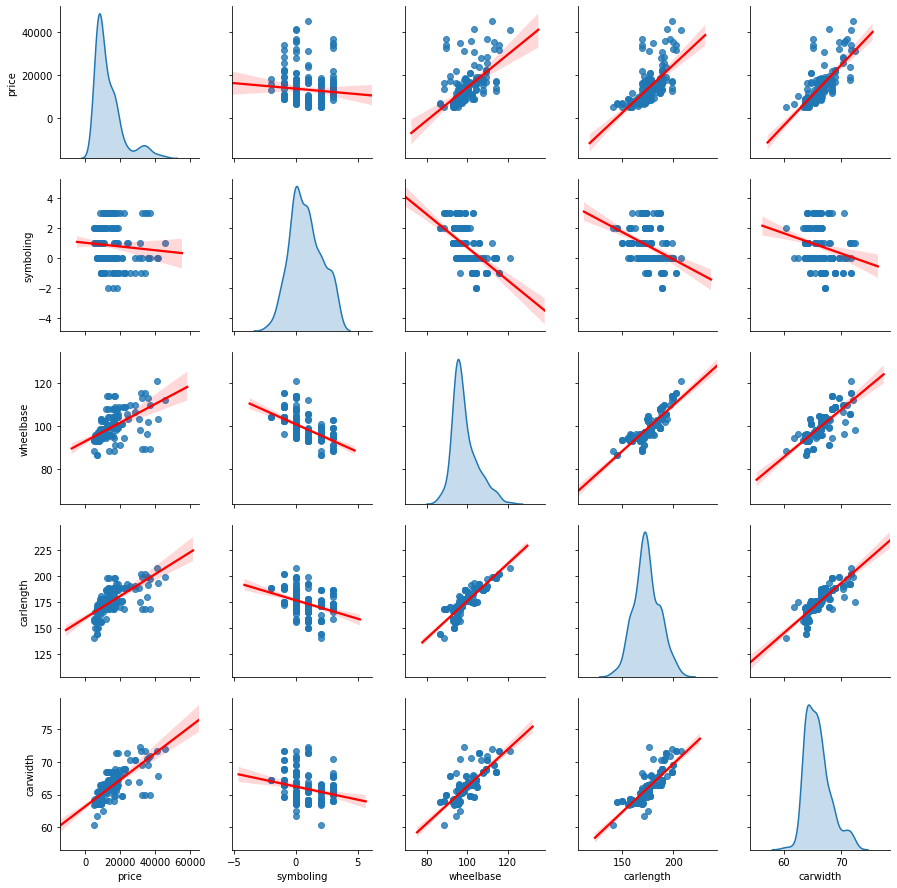

In [12]:
# Plotting pairplots
plt.figure(figsize = (15, 8))
sns.pairplot(num_data1, kind = 'reg', diag_kind = 'kde', plot_kws = {'line_kws' : {'color' : 'red'}})
plt.show()

From the pairplot we can see that **wheelbase, carlength, carwidth** have a nearly good linear relationship with price. Car price is increasing as the attributes increase.

<Figure size 1080x576 with 0 Axes>

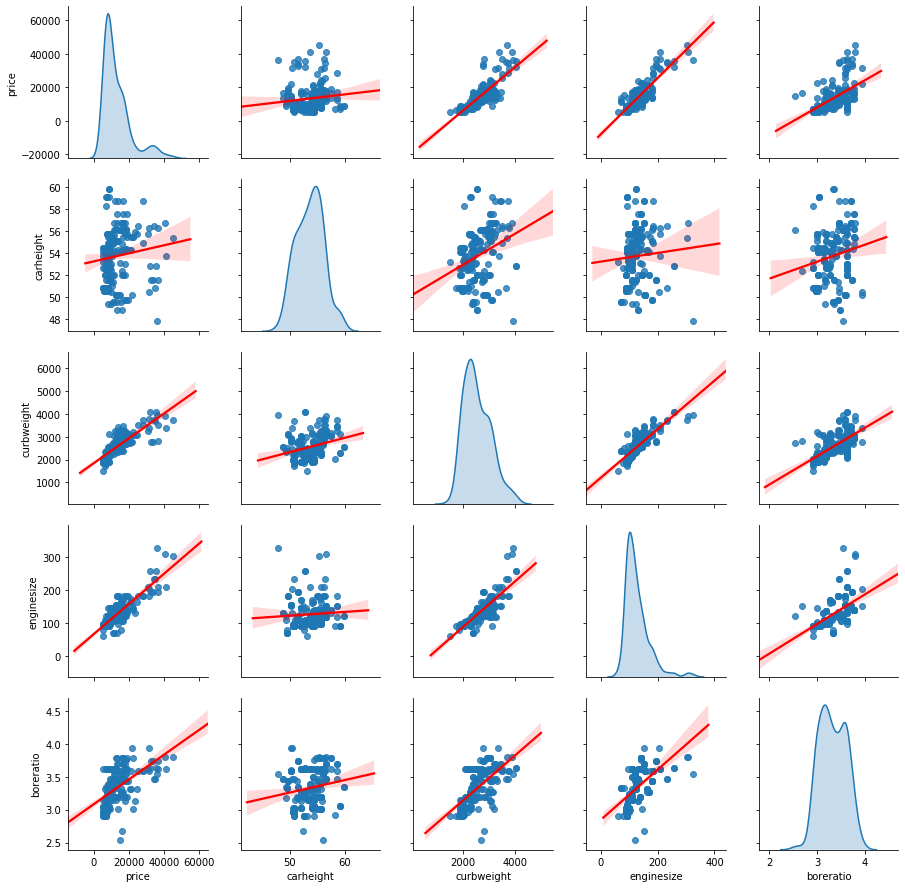

In [13]:
# Plotting pairplots
plt.figure(figsize = (15, 8))
sns.pairplot(num_data2, kind = 'reg', diag_kind = 'kde', plot_kws = {'line_kws' : {'color' : 'red'}})
plt.show()

From the pairplot we can see that **curbweight, enginesize** have a nearly good linear relationship with price. Car price is increasing as the attributes increase.

But if we look at the **boreratio**, there is variance is increasing as the price increased.

**carheight** has a different spread and can't be explained very well with a linear scale.

<Figure size 1080x576 with 0 Axes>

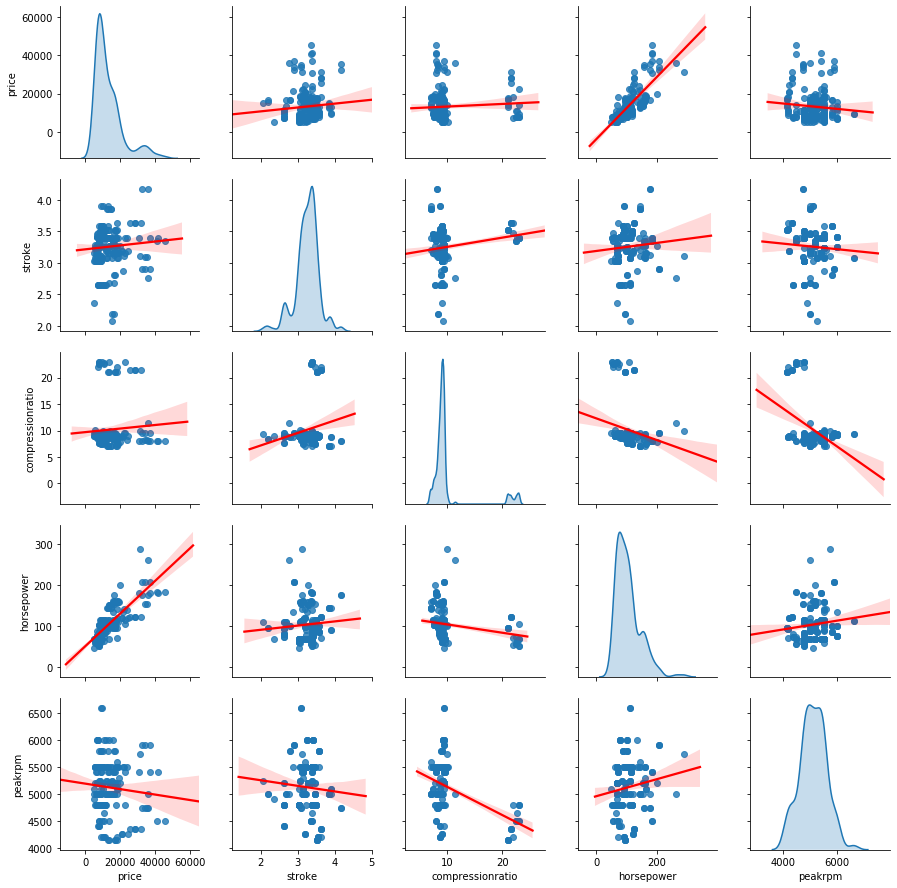

In [14]:
# Plotting pairplots
plt.figure(figsize = (15, 8))
sns.pairplot(num_data3, kind = 'reg', diag_kind = 'kde', plot_kws = {'line_kws' : {'color' : 'red'}})
plt.show()

If we look at the **horsepower**, there is variance is increasing as the price increased.

**stroke, compressionratio, peakrpm** has a different spread and can't be explained very well with a linear scale.

<Figure size 1080x576 with 0 Axes>

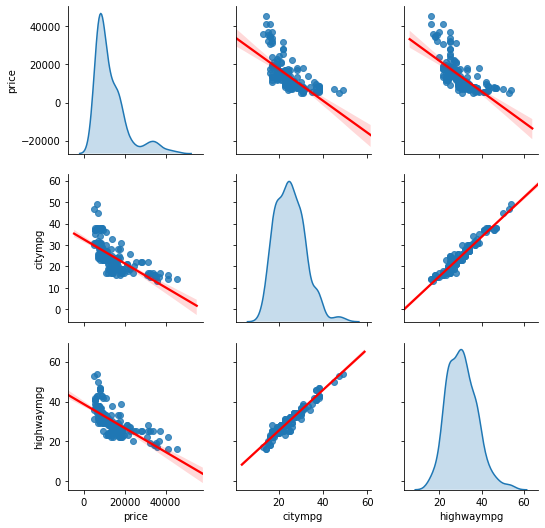

In [15]:
# Plotting pairplots
plt.figure(figsize = (15, 8))
sns.pairplot(num_data4, kind = 'reg', diag_kind = 'kde', plot_kws = {'line_kws' : {'color' : 'red'}})
plt.show()

From the pairplot we can see that **citympg, highwaympg** have a nearly good linear relationship with price. Car price is decreasing as the attributes increase.

In [16]:
# Attributes which need not be scaled
non_rescale_features = []

# Dummy attributes which are created while handling categorical variables
dummy_vars = []

## Data Preparation and Visualisation of categorical variables
### symboling

In [17]:
# symboling
data['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

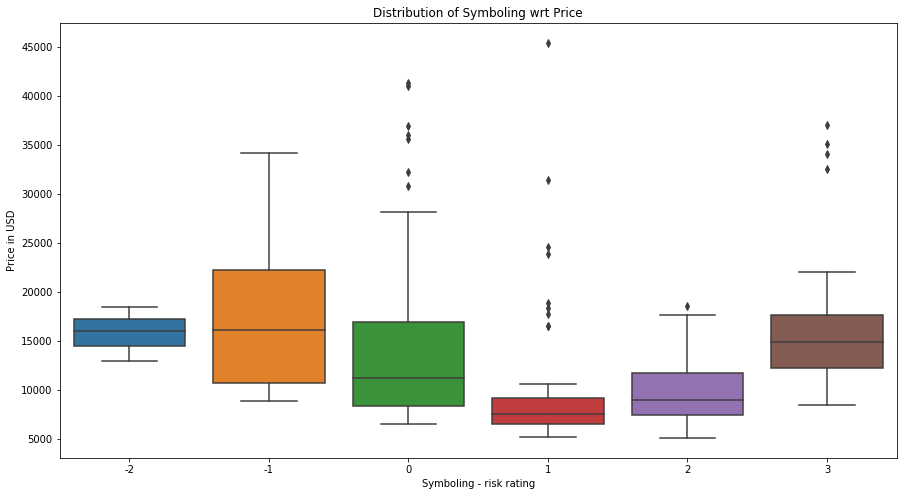

In [18]:
# Plotting boxplots of symboling
plt.figure(figsize = (15, 8))
sns.boxplot(x = 'symboling', y = 'price', data = data)
plt.ylabel('Price in USD')
plt.xlabel('Symboling - risk rating')
plt.title('Distribution of Symboling wrt Price')
plt.show()

**symboling** is a risk rating. A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

Creating segments of risky, safe and moderate risk cars.

In [19]:
def get_car_risk(riskFactor):
    if riskFactor in [1,2,3]:
        return 'risky_car'
    elif riskFactor in [-1,-2,-3]:
        return 'safe_car'
    else:
        return 'moderate_risk_car'

In [20]:
# Assigning the risk factor to each entry
data['risk_factor'] = ''
data['risk_factor'] = data['symboling'].apply(get_car_risk)
data.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,risk_factor
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,risky_car
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,risky_car
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,risky_car
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,risky_car
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,risky_car


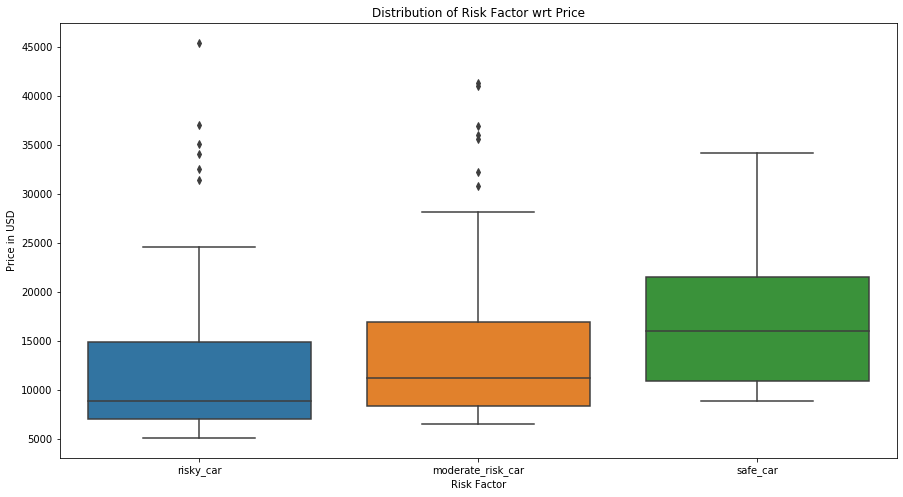

In [21]:
# Plotting boxplots of risk_factor
plt.figure(figsize = (15, 8))
sns.boxplot(x = 'risk_factor', y = 'price', data = data)
plt.ylabel('Price in USD')
plt.xlabel('Risk Factor')
plt.title('Distribution of Risk Factor wrt Price')
plt.show()

From the above plot, we can observe that cars which are safe are priced higher and the price is decreasing as the risk increases, which is a valid case.

**risk_factor** is a categorical variable with 3 levels of data. Creating dummy variables for risk_factor

In [22]:
# Creating dummy variables
temp_df = pd.get_dummies(data['risk_factor'], drop_first = True)

# Adding the dummy variables to the original dataset
data = pd.concat([data, temp_df], axis = 1)

data.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,risk_factor,risky_car,safe_car
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,2.68,9.0,111,5000,21,27,13495.0,risky_car,1,0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,2.68,9.0,111,5000,21,27,16500.0,risky_car,1,0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,3.47,9.0,154,5000,19,26,16500.0,risky_car,1,0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.40,10.0,102,5500,24,30,13950.0,risky_car,1,0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.40,8.0,115,5500,18,22,17450.0,risky_car,1,0


Now we can drop the **risk_factor** as we represented the attribute in dummy variables.

In [23]:
data.drop(['risk_factor'], axis = 1, inplace = True)
data.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,risky_car,safe_car
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,13495.0,1,0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,16500.0,1,0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154,5000,19,26,16500.0,1,0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115,5500,18,22,17450.0,1,0


In [24]:
# The newly created dummy variables need not to scaled as they already have a value in the range of 0 and 1
non_rescale_features.extend(['risky_car', 'safe_car'])
dummy_vars.extend(['risky_car', 'safe_car'])

### Car Name

In [25]:
# Extracting the company name and car model from CarName attribute
data[['Company','Model']] = data['CarName'].str.split(' ', n = 1, expand = True)
data['Company'].value_counts().sort_index(axis = 0)

Nissan          1
alfa-romero     3
audi            7
bmw             8
buick           8
chevrolet       3
dodge           9
honda          13
isuzu           4
jaguar          3
maxda           2
mazda          15
mercury         1
mitsubishi     13
nissan         17
peugeot        11
plymouth        7
porcshce        1
porsche         4
renault         2
saab            6
subaru         12
toyota         31
toyouta         1
vokswagen       1
volkswagen      9
volvo          11
vw              2
Name: Company, dtype: int64

In [26]:
# There are few spelling ismistakes in the company names. Correcting them.
data['Company'].replace({'maxda': 'mazda', 'porcshce': 'porsche', 'toyouta' : 'toyota', 'vokswagen': 'volkswagen', 'vw': 'volkswagen'}, inplace = True)

data['Company'].value_counts().sort_index(axis = 0)

Nissan          1
alfa-romero     3
audi            7
bmw             8
buick           8
chevrolet       3
dodge           9
honda          13
isuzu           4
jaguar          3
mazda          17
mercury         1
mitsubishi     13
nissan         17
peugeot        11
plymouth        7
porsche         5
renault         2
saab            6
subaru         12
toyota         32
volkswagen     12
volvo          11
Name: Company, dtype: int64

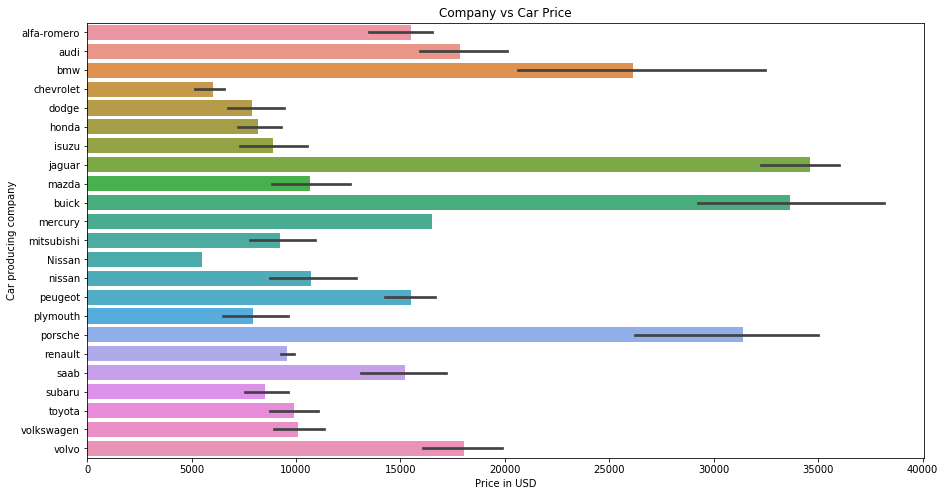

In [27]:
# Plotting price for each company
plt.figure(figsize = (15, 8))
sns.barplot(y = 'Company', x = 'price', data = data)
plt.xlabel('Price in USD')
plt.ylabel('Car producing company')
plt.title('Company vs Car Price')
plt.show()

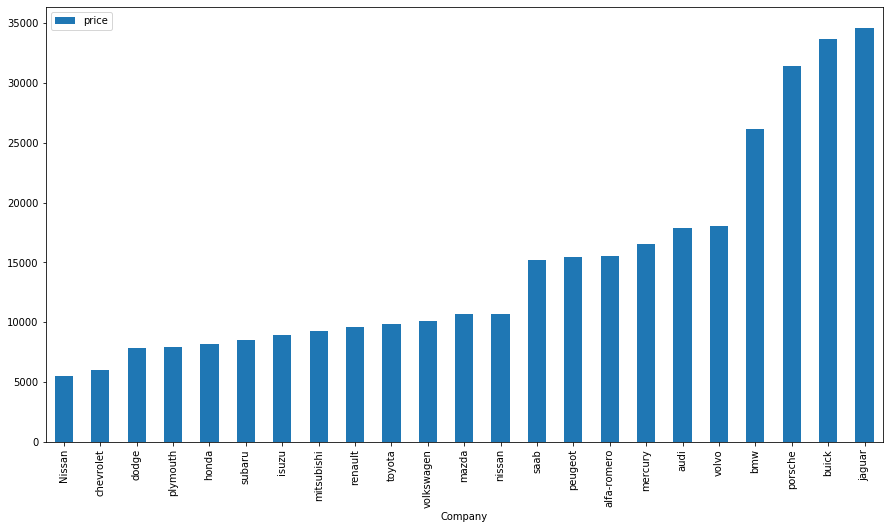

In [28]:
# Sorting based on price
data.groupby(['Company']).mean().sort_values(by = 'price').plot(y = 'price', kind = 'bar', figsize = (15, 8))

As we can see the prices of few company cars are higher, so creating segments of three car price classes (expensive_price, moderate_price, budget_price)

In [29]:
def get_price_class(company):
    if company in ['jaguar', 'buick', 'porsche', 'bmw']:
        return 'expensive_price'
    elif company in ['volvo', 'audi', 'mercury', 'alfa-romero', 'peugeot', 'saab']:
        return 'moderate_price'
    else:
        return 'budget_price'

In [30]:
# Assigning the price class to each entry
data['price_class'] = ''
data['price_class'] = data['Company'].apply(get_price_class)
data.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,horsepower,peakrpm,citympg,highwaympg,price,risky_car,safe_car,Company,Model,price_class
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,111,5000,21,27,13495.0,1,0,alfa-romero,giulia,moderate_price
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,111,5000,21,27,16500.0,1,0,alfa-romero,stelvio,moderate_price
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,154,5000,19,26,16500.0,1,0,alfa-romero,Quadrifoglio,moderate_price
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,102,5500,24,30,13950.0,1,0,audi,100 ls,moderate_price
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,115,5500,18,22,17450.0,1,0,audi,100ls,moderate_price


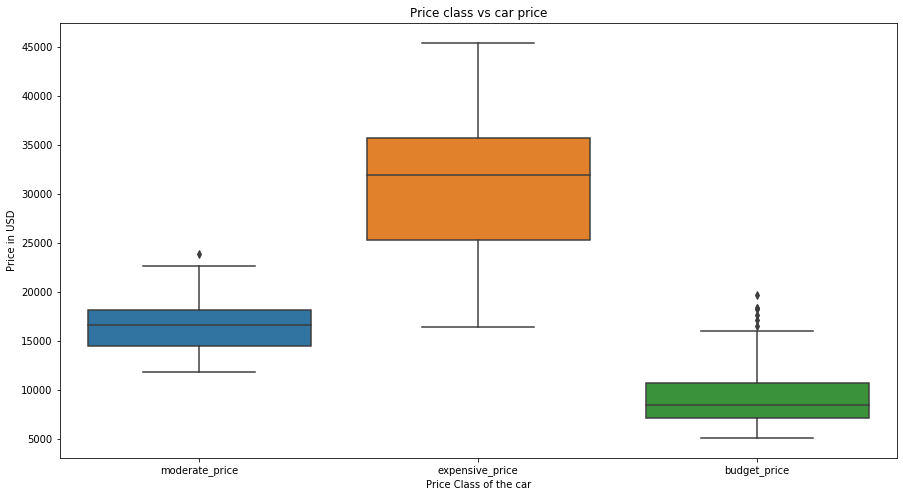

In [31]:
# Plotting boxplots of price class
plt.figure(figsize = (15, 8))
sns.boxplot(x = 'price_class', y = 'price', data = data)
plt.ylabel('Price in USD')
plt.xlabel('Price Class of the car')
plt.title('Price class vs car price')
plt.show()

From the above plot we can observe the valid price increase for most reputed car brands.

As **price_class** is categorical variable of level 3, creating dummy variables.

In [32]:
# Creating dummy variables
temp_df = pd.get_dummies(data['price_class'], drop_first = True)

# Adding the dummy variables to the original dataset
data = pd.concat([data, temp_df], axis = 1)

data.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,citympg,highwaympg,price,risky_car,safe_car,Company,Model,price_class,expensive_price,moderate_price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,21,27,13495.0,1,0,alfa-romero,giulia,moderate_price,0,1
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,21,27,16500.0,1,0,alfa-romero,stelvio,moderate_price,0,1
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,19,26,16500.0,1,0,alfa-romero,Quadrifoglio,moderate_price,0,1
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,24,30,13950.0,1,0,audi,100 ls,moderate_price,0,1
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,18,22,17450.0,1,0,audi,100ls,moderate_price,0,1


Now we can drop the **price_class** variable as we have represented it using dummy variables. Also dropping **Company, Model, CarName** as these attributes are no longer required.

In [33]:
data.drop(['price_class', 'Company', 'Model', 'CarName'], axis = 1, inplace = True)
data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,risky_car,safe_car,expensive_price,moderate_price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,9.0,111,5000,21,27,13495.0,1,0,0,1
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,9.0,111,5000,21,27,16500.0,1,0,0,1
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,9.0,154,5000,19,26,16500.0,1,0,0,1
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,10.0,102,5500,24,30,13950.0,1,0,0,1
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,8.0,115,5500,18,22,17450.0,1,0,0,1


In [34]:
# The newly created dummy variables need not to scaled as they already have a value in the range of 0 and 1
non_rescale_features.extend(['expensive_price', 'moderate_price'])
dummy_vars.extend(['expensive_price', 'moderate_price'])

### Fuel Type

In [35]:
# Fuel type
data['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

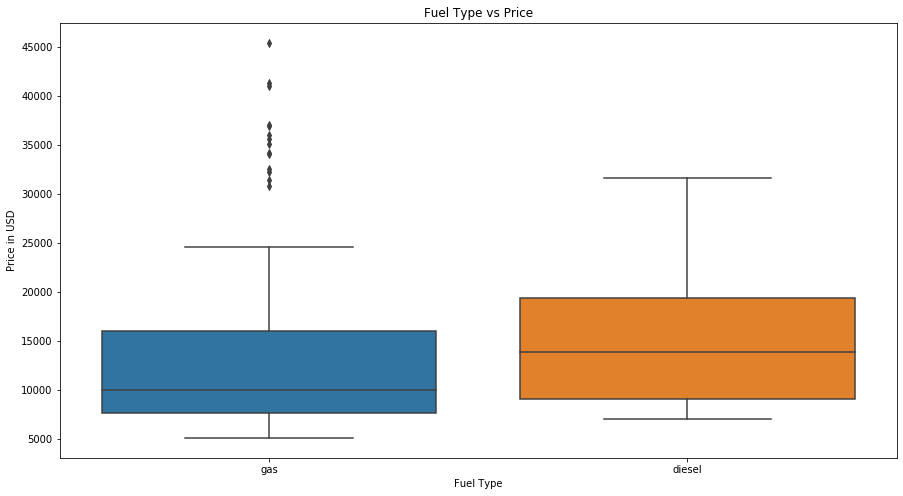

In [36]:
# Plotting a boxplot to understand the price range between different fuel types
plt.figure(figsize = (15, 8))
sns.boxplot(x = 'fueltype', y = 'price', data = data)
plt.ylabel('Price in USD')
plt.xlabel('Fuel Type')
plt.title('Fuel Type vs Price')
plt.show()

Diesel fuel cars are highly priced than gas fuel cars.

Mapping the **fueltype** attributes to represent them as 1's and 0's.

In [37]:
# Mapping to 1 and 0
data['fueltype'] = data['fueltype'].map({'gas' : 0, 'diesel' : 1})

# This attribute is already mapped to 1 or 0, so it doesn't require scaling further
non_rescale_features.extend(['fueltype'])

data['fueltype'].value_counts()

0    185
1     20
Name: fueltype, dtype: int64

### Aspiration

In [38]:
# aspiration
data['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

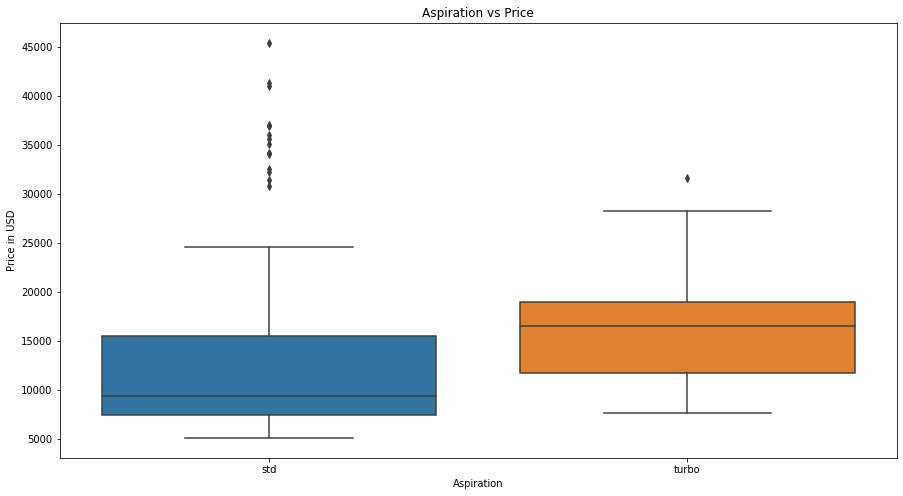

In [39]:
# Plotting a boxplot to understand the price range between different aspirations
plt.figure(figsize = (15, 8))
sns.boxplot(x = 'aspiration', y = 'price', data = data)
plt.ylabel('Price in USD')
plt.xlabel('Aspiration')
plt.title('Aspiration vs Price')
plt.show()

Turbo cars are highly priced.

Mapping the **aspiration** attributes to represent them as 1's and 0's.

In [40]:
# Mapping to 1 and 0
data['aspiration'] = data['aspiration'].map({'std' : 0, 'turbo' : 1})

# This attribute is already mapped to 1 or 0, so it doesn't require scaling further
non_rescale_features.extend(['aspiration'])

data['aspiration'].value_counts()

0    168
1     37
Name: aspiration, dtype: int64

### Door number

In [41]:
# doornumber
data['doornumber'].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

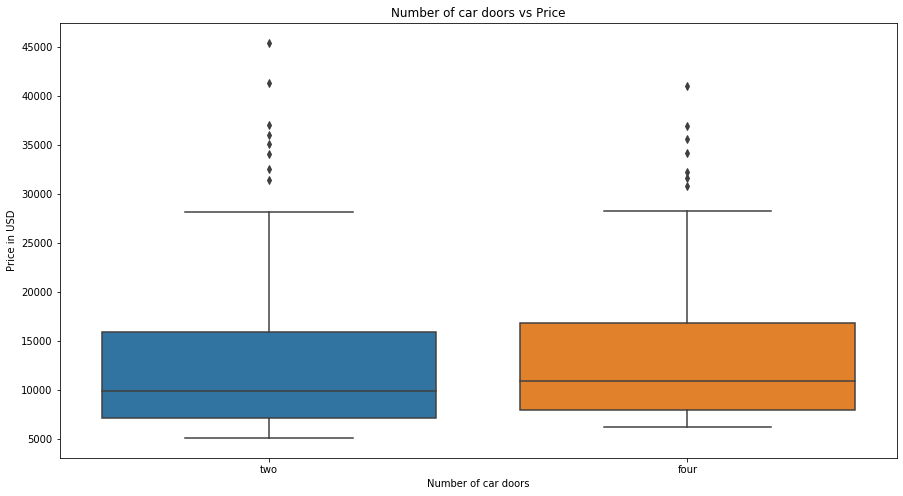

In [42]:
# Plotting a boxplot to understand the price range between different number of doors
plt.figure(figsize = (15, 8))
sns.boxplot(x = 'doornumber', y = 'price', data = data)
plt.ylabel('Price in USD')
plt.xlabel('Number of car doors')
plt.title('Number of car doors vs Price')
plt.show()

Seems like door number has no much change in the price of the car.

Mapping the **doornumber** attributes to represent them as 1's and 0's.

In [43]:
# Mapping to 1 and 0
data['doornumber'] = data['doornumber'].map({'two' : 0, 'four' : 1})

# This attribute is already mapped to 1 or 0, so it doesn't require scaling further
non_rescale_features.extend(['doornumber'])

data['doornumber'].value_counts()

1    115
0     90
Name: doornumber, dtype: int64

### Car body

In [44]:
# carbody
data['carbody'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

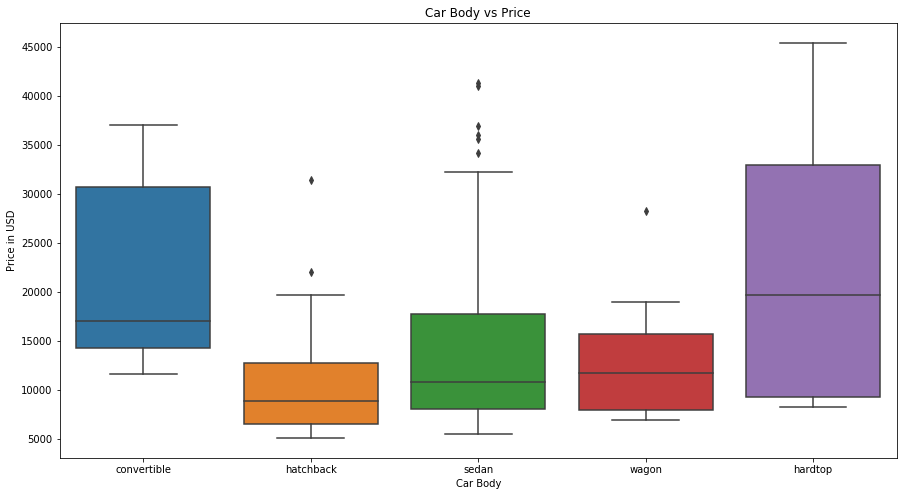

In [45]:
# Plotting a boxplot to understand the price range between different car bodies
plt.figure(figsize = (15, 8))
sns.boxplot(x = 'carbody', y = 'price', data = data)
plt.ylabel('Price in USD')
plt.xlabel('Car Body')
plt.title('Car Body vs Price')
plt.show()

Hardtop and Convertible cars are highly priced than others.


As **carbody** is categorical variable of level 5, creating dummy variables.

In [46]:
# Creating dummy variables
temp_df = pd.get_dummies(data['carbody'], drop_first = True)

# Adding the dummy variables to the original dataset
data = pd.concat([data, temp_df], axis = 1)

data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,highwaympg,price,risky_car,safe_car,expensive_price,moderate_price,hardtop,hatchback,sedan,wagon
0,3,0,0,0,convertible,rwd,front,88.6,168.8,64.1,...,27,13495.0,1,0,0,1,0,0,0,0
1,3,0,0,0,convertible,rwd,front,88.6,168.8,64.1,...,27,16500.0,1,0,0,1,0,0,0,0
2,1,0,0,0,hatchback,rwd,front,94.5,171.2,65.5,...,26,16500.0,1,0,0,1,0,1,0,0
3,2,0,0,1,sedan,fwd,front,99.8,176.6,66.2,...,30,13950.0,1,0,0,1,0,0,1,0
4,2,0,0,1,sedan,4wd,front,99.4,176.6,66.4,...,22,17450.0,1,0,0,1,0,0,1,0


Now we can drop **carbody** attribute as we have represented it in terms of dummy variables.

In [47]:
data.drop(['carbody'], axis = 1, inplace = True)
data.head()

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,highwaympg,price,risky_car,safe_car,expensive_price,moderate_price,hardtop,hatchback,sedan,wagon
0,3,0,0,0,rwd,front,88.6,168.8,64.1,48.8,...,27,13495.0,1,0,0,1,0,0,0,0
1,3,0,0,0,rwd,front,88.6,168.8,64.1,48.8,...,27,16500.0,1,0,0,1,0,0,0,0
2,1,0,0,0,rwd,front,94.5,171.2,65.5,52.4,...,26,16500.0,1,0,0,1,0,1,0,0
3,2,0,0,1,fwd,front,99.8,176.6,66.2,54.3,...,30,13950.0,1,0,0,1,0,0,1,0
4,2,0,0,1,4wd,front,99.4,176.6,66.4,54.3,...,22,17450.0,1,0,0,1,0,0,1,0


In [48]:
# The newly created dummy variables need not to scaled as they already have a value in the range of 0 and 1
non_rescale_features.extend(['hardtop', 'hatchback', 'sedan', 'wagon'])
dummy_vars.extend(['hardtop', 'hatchback', 'sedan', 'wagon'])

### Drive wheel

In [49]:
# drivewheel
data['drivewheel'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

We can assume that the value '4wd' was misplet for 'fwd'. Correcting the spelling.

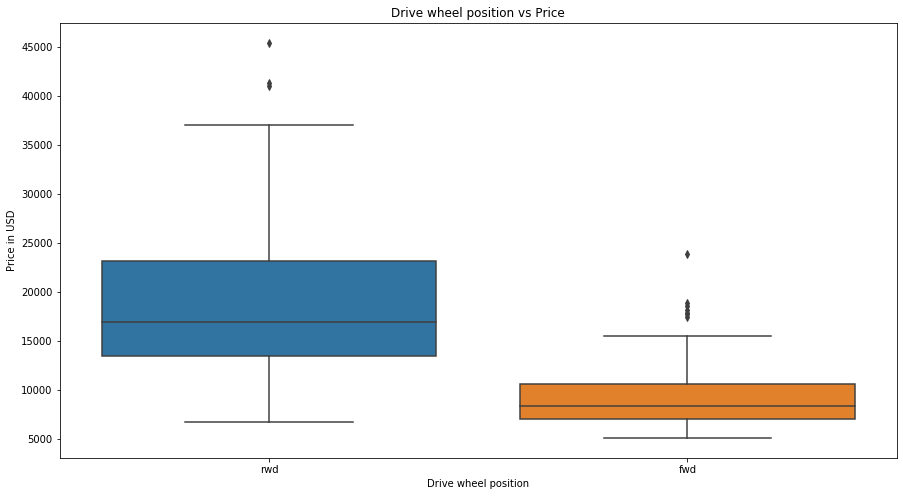

In [50]:
data['drivewheel'].replace({'4wd': 'fwd'}, inplace = True)

#Plotting a box plot to understand if the position of drive wheel changes the price of the car
plt.figure(figsize = (15, 8))
sns.boxplot(x = 'drivewheel', y = 'price', data = data)
plt.ylabel('Price in USD')
plt.xlabel('Drive wheel position')
plt.title('Drive wheel position vs Price')
plt.show()

Forward drive wheel cars are less price.

Mapping **drivewheel** attribute to represent as 1's and 0's.

In [51]:
# Mapping to 1 and 0
data['drivewheel'] = data['drivewheel'].map({'fwd' : 0, 'rwd' : 1})

# This attribute is already mapped to 1 or 0, so it doesn't require scaling further
non_rescale_features.extend(['drivewheel'])

data['drivewheel'].value_counts()

0    129
1     76
Name: drivewheel, dtype: int64

### Engine location

In [52]:
# enginelocation
data['enginelocation'].value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

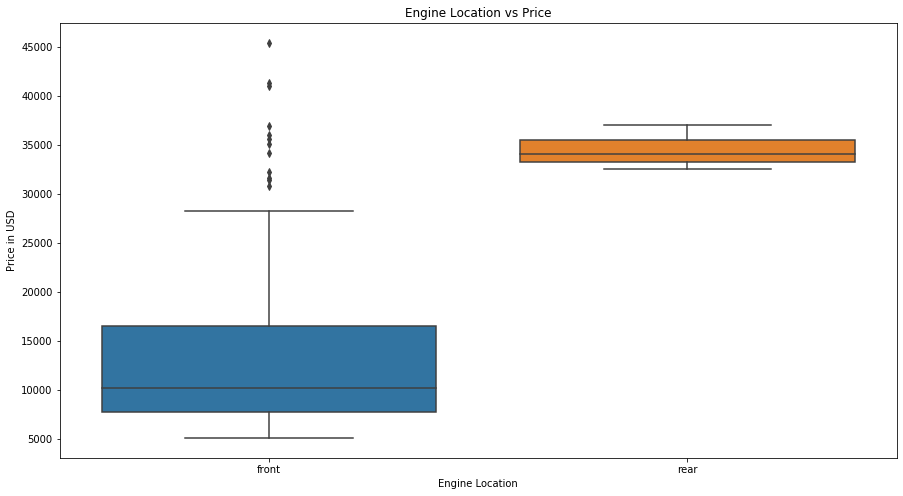

In [53]:
# Plotting a box plot to understand the price change for engine location change
plt.figure(figsize = (15, 8))
sns.boxplot(x = 'enginelocation', y = 'price', data = data)
plt.ylabel('Price in USD')
plt.xlabel('Engine Location')
plt.title('Engine Location vs Price')
plt.show()

From the above plot, we can observe that the car which have their engine located at the rear are more pricier.

Mapping **enginelocation** to represent as 1's and 0's.

In [54]:
# Mapping to 1 and 0
data['enginelocation'] = data['enginelocation'].map({'front' : 0, 'rear' : 1})

# This attribute is already mapped to 1 or 0, so it doesn't require scaling further
non_rescale_features.extend(['enginelocation'])

data['enginelocation'].value_counts()

0    202
1      3
Name: enginelocation, dtype: int64

### Engine Type

In [55]:
# enginetype
data['enginetype'].value_counts()

ohc      148
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

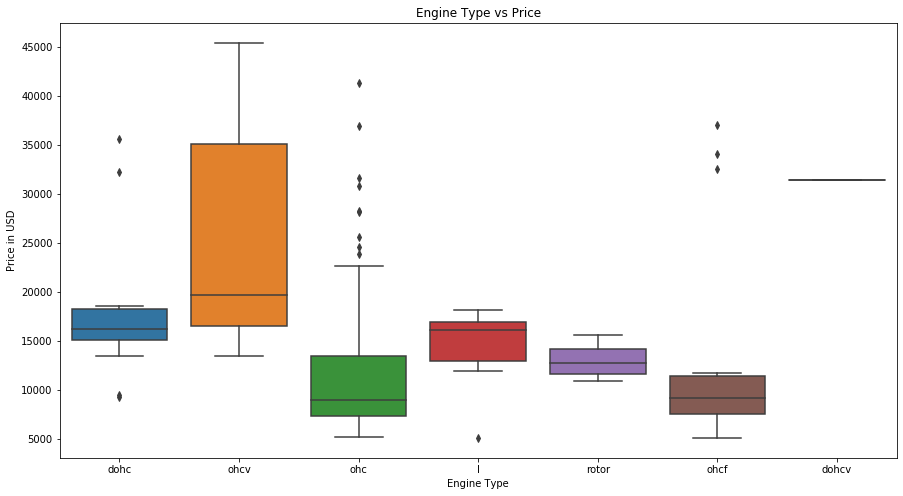

In [56]:
# Plotting a box plot to understand the price change for engine type change
plt.figure(figsize = (15, 8))
sns.boxplot(x = 'enginetype', y = 'price', data = data)
plt.ylabel('Price in USD')
plt.xlabel('Engine Type')
plt.title('Engine Type vs Price')
plt.show()

ohcv engine cars are highly priced than others.


As **enginetype** is categorical variable of level 7, creating dummy variables.

In [57]:
# Creating dummy variables
temp_df = pd.get_dummies(data['enginetype'], drop_first = True)

# Adding the dummy variables to the original dataset
data = pd.concat([data, temp_df], axis = 1)

data.head()

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,hardtop,hatchback,sedan,wagon,dohcv,l,ohc,ohcf,ohcv,rotor
0,3,0,0,0,1,0,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,0,0,0
1,3,0,0,0,1,0,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,0,94.5,171.2,65.5,52.4,...,0,1,0,0,0,0,0,0,1,0
3,2,0,0,1,0,0,99.8,176.6,66.2,54.3,...,0,0,1,0,0,0,1,0,0,0
4,2,0,0,1,0,0,99.4,176.6,66.4,54.3,...,0,0,1,0,0,0,1,0,0,0


Now we can drop **enginetype** attribute as we have represented it as dummy variables.

In [58]:
data.drop(['enginetype'], axis = 1, inplace = True)
data.head()

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,hardtop,hatchback,sedan,wagon,dohcv,l,ohc,ohcf,ohcv,rotor
0,3,0,0,0,1,0,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,0,0,0
1,3,0,0,0,1,0,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,0,94.5,171.2,65.5,52.4,...,0,1,0,0,0,0,0,0,1,0
3,2,0,0,1,0,0,99.8,176.6,66.2,54.3,...,0,0,1,0,0,0,1,0,0,0
4,2,0,0,1,0,0,99.4,176.6,66.4,54.3,...,0,0,1,0,0,0,1,0,0,0


In [59]:
# The newly created dummy variables need not to scaled as they already have a value in the range of 0 and 1
non_rescale_features.extend(['dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor'])
dummy_vars.extend(['dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor'])

### Cylinder number

In [60]:
# cylindernumber
data['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

In [61]:
# Cylinder number is a numeric attribute which is recorded as categorical words. Converting them to correct data type (numeric)
data['cylindernumber'] = data['cylindernumber'].map({'four' : 4, 'six' :  6, 'five' : 5, 'eight' :  8, 'two' : 2, 'three' : 3, 'twelve' : 12})
data['cylindernumber'].value_counts()

4     159
6      24
5      11
8       5
2       4
12      1
3       1
Name: cylindernumber, dtype: int64

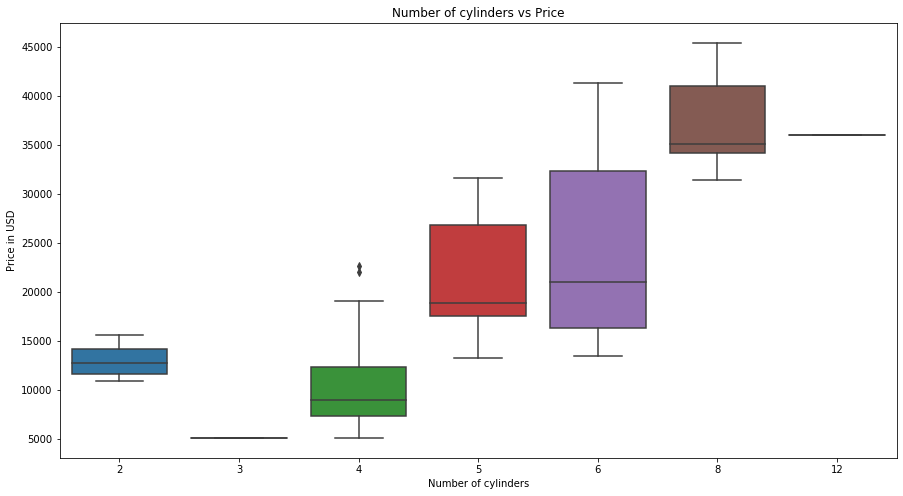

In [62]:
# Plotting a box plot to understand the price difference for change in number of cylinders.
plt.figure(figsize = (15, 8))
sns.boxplot(x = 'cylindernumber', y = 'price', data = data)
plt.ylabel('Price in USD')
plt.xlabel('Number of cylinders')
plt.title('Number of cylinders vs Price')
plt.show()

From the above plot, we can observe that the price increased when cylinder numbers also increased.

### Fuel System

In [63]:
# fuelsystem
data['fuelsystem'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
spfi     1
mfi      1
Name: fuelsystem, dtype: int64

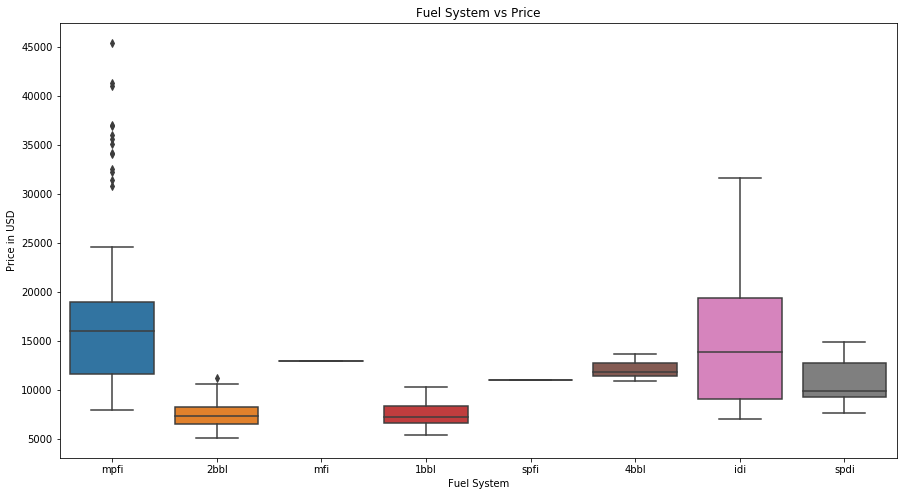

In [64]:
# Plotting a box plot to understand the price difference for change in fuel systems
plt.figure(figsize = (15, 8))
sns.boxplot(x = 'fuelsystem', y = 'price', data = data)
plt.ylabel('Price in USD')
plt.xlabel('Fuel System')
plt.title('Fuel System vs Price')
plt.show()

idi and mpfi fuel systems have higher prices.

As **fuelsystem** is categorical variable of level 8, creating dummy variables.

In [65]:
# Creating dummy variables
temp_df = pd.get_dummies(data['fuelsystem'], drop_first = True)

# Adding the dummy variables to the original dataset
data = pd.concat([data, temp_df], axis = 1)

data.head()

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,3,0,0,0,1,0,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,1,0,0
1,3,0,0,0,1,0,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,1,0,94.5,171.2,65.5,52.4,...,0,1,0,0,0,0,0,1,0,0
3,2,0,0,1,0,0,99.8,176.6,66.2,54.3,...,0,0,0,0,0,0,0,1,0,0
4,2,0,0,1,0,0,99.4,176.6,66.4,54.3,...,0,0,0,0,0,0,0,1,0,0


Now we can drop **fuelsystem** attribute as we have represented it as dummy variables.

In [66]:
data.drop(['fuelsystem'], axis = 1, inplace = True)
data.head()

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,3,0,0,0,1,0,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,1,0,0
1,3,0,0,0,1,0,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,1,0,94.5,171.2,65.5,52.4,...,0,1,0,0,0,0,0,1,0,0
3,2,0,0,1,0,0,99.8,176.6,66.2,54.3,...,0,0,0,0,0,0,0,1,0,0
4,2,0,0,1,0,0,99.4,176.6,66.4,54.3,...,0,0,0,0,0,0,0,1,0,0


In [67]:
# The newly created dummy variables need not to scaled as they already have a value in the range of 0 and 1
non_rescale_features.extend(['2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi'])
dummy_vars.extend(['2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi'])

In [68]:
# Checking all the columns
data.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'drivewheel',
       'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'risky_car', 'safe_car', 'expensive_price', 'moderate_price',
       'hardtop', 'hatchback', 'sedan', 'wagon', 'dohcv', 'l', 'ohc', 'ohcf',
       'ohcv', 'rotor', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi'],
      dtype='object')

## Analysing the dependent variable *price*

In [69]:
# price
data['price'].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

We can observe a huge change in the price distribution in the last quartile range. 

In [70]:
data['price'].quantile([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

0.0     5118.0
0.1     6657.0
0.2     7385.8
0.3     8022.0
0.4     9036.6
0.5    10295.0
0.6    12515.6
0.7    15458.0
0.8    17493.8
0.9    22563.0
1.0    45400.0
Name: price, dtype: float64

We can see that the outliers are present in the last 90th percentile to 100th percentile range.

In [71]:
data['price'].quantile([0.90, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0])

0.90    22563.00
0.91    24316.60
0.92    27336.32
0.93    30056.64
0.94    31552.12
0.95    32472.40
0.96    34159.04
0.97    35490.72
0.98    36809.60
0.99    40802.72
1.00    45400.00
Name: price, dtype: float64

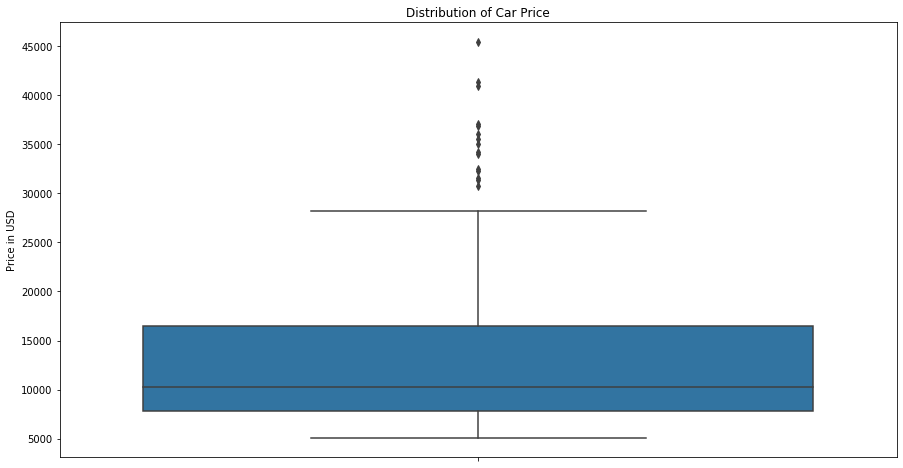

In [72]:
plt.figure(figsize = (15, 8))
sns.boxplot(y = data['price'])
plt.ylabel('Price in USD')
plt.title('Distribution of Car Price')
plt.show()

From the above plot, we can observe that outliers are presents after the price range of 30,000 USD 

In [73]:
# Removing outliers
Q = data.quantile(0.93)
data1 = data[data['price'] <= Q['price']]

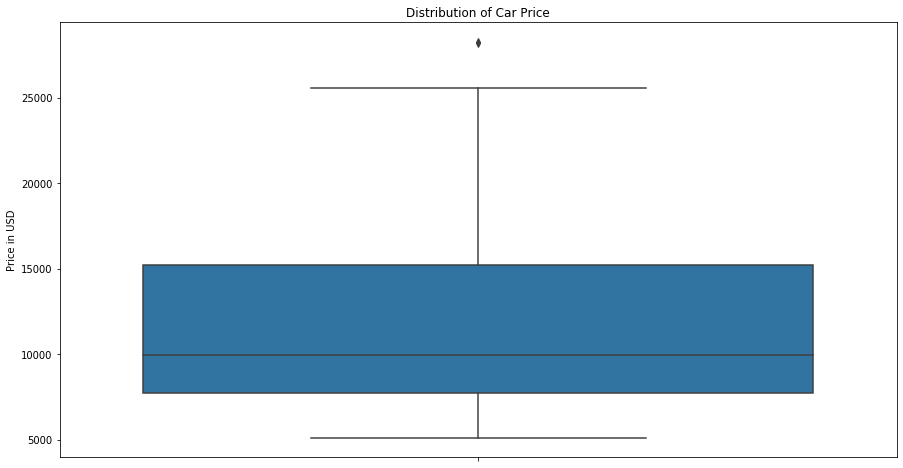

In [74]:
plt.figure(figsize = (15, 8))
sns.boxplot(y = data1['price'])
plt.ylabel('Price in USD')
plt.title('Distribution of Car Price')
plt.show()

I have built different models with different approaches for the analysis, one such approach is to eliminate the outliers and not to eliminate them. The comparision of different approaches is presented at the later part of this notebook.

In [75]:
# Checking for any missing values
round(100 * (data.isnull().sum() / len(data)), 2)

symboling           0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
cylindernumber      0.0
enginesize          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
risky_car           0.0
safe_car            0.0
expensive_price     0.0
moderate_price      0.0
hardtop             0.0
hatchback           0.0
sedan               0.0
wagon               0.0
dohcv               0.0
l                   0.0
ohc                 0.0
ohcf                0.0
ohcv                0.0
rotor               0.0
2bbl                0.0
4bbl                0.0
idi                 0.0
mfi                 0.0
mpfi                0.0
spdi                0.0
spfi            

Now we have cleaned the data and can proceed with data splitting, scaling and modelling.

## Data Splitting

In [76]:
# Splitting data into train and test sets
np.random.seed(0)
train_data, test_data = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [77]:
train_data.shape

(143, 42)

In [78]:
test_data.shape

(62, 42)

## Data Scaling

In [79]:
# Retrieving only the columns which need to be scaled
all_cols = train_data.columns
scaling_cols = list(set(all_cols) - set(non_rescale_features))
scaling_cols

['carheight',
 'carlength',
 'stroke',
 'highwaympg',
 'price',
 'wheelbase',
 'horsepower',
 'carwidth',
 'citympg',
 'curbweight',
 'cylindernumber',
 'boreratio',
 'peakrpm',
 'compressionratio',
 'enginesize',
 'symboling']

As mentioned earlier, I created different models for comparision between the two different scaling techniques as well.
- MinMax Scaling technique
- Standardization scaling technique

The comparison of different approaches is presented at the end of this notebook.

I am using the Standard Scaler for this analysis as there is no very huge value differences in the **scaling_cols** attributes. 

**Scaling is not applied to the dummy variables or the variables which have the value ranges between 0 and 1, as standard scaling affects such variables.**

In [80]:
# Standar scalar
scaler = StandardScaler()

In [81]:
# Scaling train data
train_data[scaling_cols] = scaler.fit_transform(train_data[scaling_cols])
train_data.head()

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
122,0.170159,0,0,1,0,0,-0.811836,-0.487238,-0.924500,-1.134628,...,0,0,0,1,0,0,0,0,0,0
125,1.848278,0,0,0,1,0,-0.677177,-0.359789,1.114978,-1.382026,...,0,0,0,0,0,0,0,1,0,0
166,0.170159,0,0,0,1,0,-0.677177,-0.375720,-0.833856,-0.392434,...,0,0,0,0,0,0,0,1,0,0
1,1.848278,0,0,0,1,0,-1.670284,-0.367754,-0.788535,-1.959288,...,0,0,0,0,0,0,0,1,0,0
199,-1.507960,0,1,1,1,0,0.972390,1.225364,0.616439,1.627983,...,0,0,0,0,0,0,0,1,0,0


In [82]:
train_data.describe()

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
count,1.430000e+02,143.000000,143.000000,143.000000,143.000000,143.000000,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0
mean,5.473477e-17,0.090909,0.181818,0.559441,0.349650,0.006993,1.538785e-15,2.003060e-16,-4.093074e-15,5.450186e-16,...,0.083916,0.062937,0.027972,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0
std,1.003515e+00,0.288490,0.387050,0.498199,0.478536,0.083624,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,...,0.278236,0.243703,0.165472,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0
min,-2.347020e+00,0.000000,0.000000,0.000000,0.000000,0.000000,-2.006930e+00,-2.574223e+00,-2.510760e+00,-2.371619e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
25%,-6.689008e-01,0.000000,0.000000,0.000000,0.000000,0.000000,-6.771770e-01,-6.186702e-01,-8.565171e-01,-7.222984e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
50%,1.701590e-01,0.000000,0.000000,1.000000,0.000000,0.000000,-3.405307e-01,-1.128552e-01,-1.993522e-01,6.112865e-02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
75%,1.701590e-01,0.000000,0.000000,1.000000,1.000000,0.000000,4.505882e-01,7.076008e-01,4.804736e-01,7.414732e-01,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.0
max,1.848278e+00,1.000000,1.000000,1.000000,1.000000,1.000000,2.874442e+00,2.324616e+00,2.927846e+00,2.287711e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0


In [83]:
# Scaling test data
test_data[scaling_cols] = scaler.fit_transform(test_data[scaling_cols])
test_data.head()

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
160,-0.682207,0,0,1,0,0,-0.587157,-0.794680,-0.845273,-0.464750,...,0,0,0,1,0,0,0,0,0,0
186,0.801892,0,0,1,0,0,-0.325847,-0.328646,-0.286672,0.651450,...,0,0,0,0,0,0,0,1,0,0
59,0.059843,0,0,0,0,0,-0.080869,0.197800,0.221147,-0.175365,...,0,0,0,1,0,0,0,0,0,0
165,0.059843,0,0,0,1,0,-0.783139,-0.587554,-1.048400,-0.630112,...,0,0,0,0,0,0,0,1,0,0
140,0.801892,0,0,0,0,0,-0.979122,-1.571403,-1.149964,0.651450,...,1,0,0,1,0,0,0,0,0,0


In [84]:
test_data.describe()

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
count,6.200000e+01,62.000000,62.000000,62.000000,62.000000,62.000000,6.200000e+01,6.200000e+01,6.200000e+01,6.200000e+01,...,62.000000,62.000000,62.0,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000
mean,-3.939501e-17,0.112903,0.177419,0.564516,0.419355,0.032258,-2.005564e-16,5.837624e-16,1.158571e-15,2.897324e-15,...,0.048387,0.064516,0.0,0.258065,0.0,0.112903,0.016129,0.500000,0.048387,0.016129
std,1.008163e+00,0.319058,0.385142,0.499868,0.497482,0.178127,1.008163e+00,1.008163e+00,1.008163e+00,1.008163e+00,...,0.216335,0.247676,0.0,0.441142,0.0,0.319058,0.127000,0.504082,0.216335,0.127000
min,-2.166306e+00,0.000000,0.000000,0.000000,0.000000,0.000000,-2.073357e+00,-2.667447e+00,-1.810128e+00,-1.953015e+00,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.822068e-01,0.000000,0.000000,0.000000,0.000000,0.000000,-5.871570e-01,-5.314570e-01,-7.437089e-01,-8.161456e-01,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.984270e-02,0.000000,0.000000,1.000000,0.000000,0.000000,-2.360218e-01,-6.110781e-02,-2.358900e-01,1.346907e-01,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.500000,0.000000,0.000000
75%,8.018922e-01,0.000000,0.000000,1.000000,1.000000,0.000000,6.295672e-01,8.515423e-01,2.211469e-01,6.514496e-01,...,0.000000,0.000000,0.0,0.750000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.543942e+00,1.000000,1.000000,1.000000,1.000000,1.000000,3.528474e+00,2.812769e+00,3.014150e+00,2.346419e+00,...,1.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


## Model Building 

Using the statsmodel for model generation. 

In [85]:
# Method to calculate the stats model summary and VIF 
def model_building_stats(X, y):
    X_lm = sm.add_constant(X)
    lr = sm.OLS(y, X_lm).fit()
    print(lr.summary())
    
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

In [86]:
# Seperating out the dependent variable
y_train = train_data.pop('price')
X_train = train_data

### Model 1 - With all attributes considered

In [87]:
model_building_stats(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     55.03
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           1.33e-53
Time:                        08:55:24   Log-Likelihood:                 15.134
No. Observations:                 143   AIC:                             47.73
Df Residuals:                     104   BIC:                             163.3
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1217      0.268  

From the above stats we can observe that **Model 1** which is built with all attributes has very high multicollinearity as we have very high p-values and VIF values.

VIF values is infinite for few attributes, which means that these attributes have exact linear correlation with others.

### Getting top 20 significant attributes using RFE method

In [88]:
lm = LinearRegression()
lm.fit(X_train, y_train)

# Choosing 20 attributes
rfe = RFE(lm, 20)
rfe = rfe.fit(X_train, y_train)

In [89]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('symboling', False, 9),
 ('fueltype', True, 1),
 ('aspiration', False, 7),
 ('doornumber', False, 20),
 ('drivewheel', False, 6),
 ('enginelocation', True, 1),
 ('wheelbase', False, 5),
 ('carlength', False, 16),
 ('carwidth', True, 1),
 ('carheight', False, 18),
 ('curbweight', True, 1),
 ('cylindernumber', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 2),
 ('horsepower', True, 1),
 ('peakrpm', False, 13),
 ('citympg', False, 4),
 ('highwaympg', False, 10),
 ('risky_car', False, 8),
 ('safe_car', False, 19),
 ('expensive_price', True, 1),
 ('moderate_price', True, 1),
 ('hardtop', True, 1),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('dohcv', False, 15),
 ('l', False, 3),
 ('ohc', True, 1),
 ('ohcf', True, 1),
 ('ohcv', False, 14),
 ('rotor', True, 1),
 ('2bbl', False, 11),
 ('4bbl', False, 17),
 ('idi', True, 1),
 ('mfi', False, 21),
 ('mpfi', False, 12),
 ('spdi', True, 1),
 ('spfi', False, 

In [90]:
# Filtering out significant attributes obtained from RFE
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
X_train_rfe.columns

Index(['fueltype', 'enginelocation', 'carwidth', 'curbweight',
       'cylindernumber', 'enginesize', 'boreratio', 'stroke', 'horsepower',
       'expensive_price', 'moderate_price', 'hardtop', 'hatchback', 'sedan',
       'wagon', 'ohc', 'ohcf', 'rotor', 'idi', 'spdi'],
      dtype='object')

### Analysing the correlation between the top 20 significant attributes which are obtained from RFE method

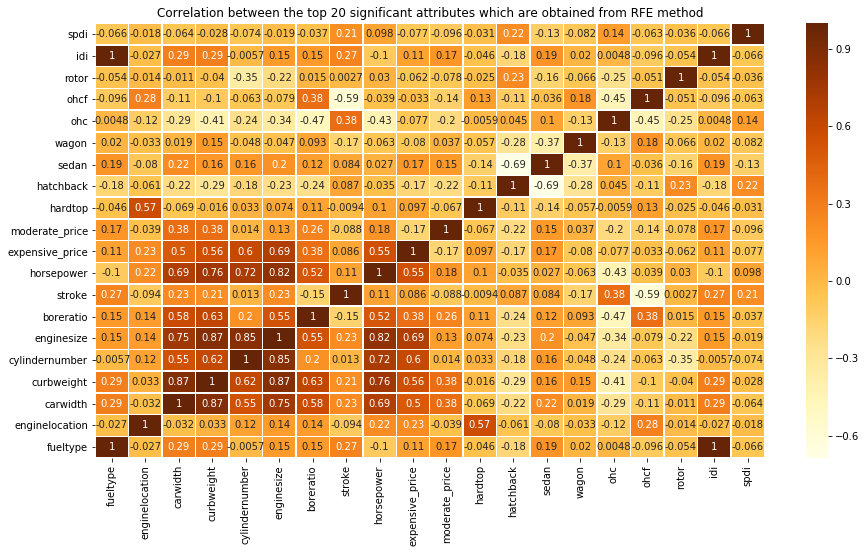

In [91]:
# Plotting a heat map
plt.figure(figsize = (15,8))
ax = sns.heatmap(X_train_rfe.corr(), annot = True, linewidth = 0.5, cmap = "YlOrBr")
t, bot = ax.get_ylim()
ax.set_ylim(top = t + 0.5, bottom = bot - 0.5)
plt.title('Correlation between the top 20 significant attributes which are obtained from RFE method')
plt.show()

From the above heatmap, we can clearly observe that **fueltype and idi** have a perfect correlation of 1, that means that one of the attribute can perfectly explain the other.

There is also good correlation between **enginesize, cylindernumber, curbweight, carwidth, horsepower** attribute. Let us now build a model using these parameters and verify our results with the VIF and p-value scores.

### Model 2 - With top 20 significant attributes obtained from RFE

In [92]:
model_building_stats(X_train_rfe, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     115.0
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           7.71e-69
Time:                        08:55:25   Log-Likelihood:                 6.7406
No. Observations:                 143   AIC:                             26.52
Df Residuals:                     123   BIC:                             85.78
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0582      0.147     

Our analyse from the above heatmap holds true, fueltype and idi have VIF as infinite, and the **enginesize, cylindernumber, curbweight, horsepower, carwidth** have higher VIF values as expected.

From the above stats, we can observe that **hardtop** has high p-value, thus building another model by dropping it.

### Model 3 - Dropping *hardtop*

In [93]:
X_train_updated = X_train_rfe.drop(['hardtop'], axis=1)
model_building_stats(X_train_updated, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     120.6
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           1.60e-69
Time:                        08:55:26   Log-Likelihood:                 5.7553
No. Observations:                 143   AIC:                             26.49
Df Residuals:                     124   BIC:                             82.78
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.1621      0.124     

From the above stats, we can observe that **spdi** has high p-value, thus building another model by dropping it.

### Model 4 - Dropping *spdi*

In [94]:
X_train_updated = X_train_updated.drop(['spdi'], axis=1)
model_building_stats(X_train_updated, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     126.4
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           4.16e-70
Time:                        08:55:26   Log-Likelihood:                 4.4900
No. Observations:                 143   AIC:                             27.02
Df Residuals:                     125   BIC:                             80.35
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.1568      0.125     

From the above stats, we can observe that **ohcf** has high p-value, thus building another model by dropping it.

### Model 5 - Dropping *ohcf*

In [95]:
X_train_updated = X_train_updated.drop(['ohcf'], axis=1)
model_building_stats(X_train_updated, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     133.1
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           9.63e-71
Time:                        08:55:26   Log-Likelihood:                 3.3383
No. Observations:                 143   AIC:                             27.32
Df Residuals:                     126   BIC:                             77.69
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.1234      0.123     

From the above stats, we can observe that **sedan** has high p-value, thus building another model by dropping it.

### Model 6 - Dropping *sedan*

In [96]:
X_train_updated = X_train_updated.drop(['sedan'], axis=1)
model_building_stats(X_train_updated, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     140.6
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           2.18e-71
Time:                        08:55:26   Log-Likelihood:                 2.1883
No. Observations:                 143   AIC:                             27.62
Df Residuals:                     127   BIC:                             75.03
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.2735      0.065     

From the above stats, we can observe that **wagon** has high p-value, thus building another model by dropping it.

### Model 7 - Dropping *wagon*

In [97]:
X_train_updated = X_train_updated.drop(['wagon'], axis=1)
model_building_stats(X_train_updated, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     150.6
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           2.87e-72
Time:                        08:55:26   Log-Likelihood:                 1.6203
No. Observations:                 143   AIC:                             26.76
Df Residuals:                     128   BIC:                             71.20
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.2979      0.060     

From the above stats, we can observe that **curbweight** has high p-value and VIF value, thus building another model by dropping it.

### Model 8 - Dropping *curbweight*

In [98]:
X_train_updated = X_train_updated.drop(['curbweight'], axis=1)
model_building_stats(X_train_updated, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     161.8
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           4.08e-73
Time:                        08:55:26   Log-Likelihood:                0.93169
No. Observations:                 143   AIC:                             26.14
Df Residuals:                     129   BIC:                             67.62
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.2920      0.060     

All the p-values are in a considerable range, hence dropping attributes with high VIF.

From the above stats, we can observe that **fueltype** has high VIF value, thus building another model by dropping it.

### Model 9 - Dropping *fueltype*

In [99]:
X_train_updated = X_train_updated.drop(['fueltype'], axis=1)
model_building_stats(X_train_updated, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     161.8
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           4.08e-73
Time:                        08:55:26   Log-Likelihood:                0.93169
No. Observations:                 143   AIC:                             26.14
Df Residuals:                     129   BIC:                             67.62
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.2920      0.060     

All the p-values are still in a considerable range, hence dropping attributes with high VIF.

From the above stats, we can observe that **enginesize** has high VIF value, thus building another model by dropping it.

### Model 10 - Dropping *enginesize*

In [100]:
X_train_updated = X_train_updated.drop(['enginesize'], axis=1)
model_building_stats(X_train_updated, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     133.5
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           6.51e-67
Time:                        08:55:26   Log-Likelihood:                -17.750
No. Observations:                 143   AIC:                             61.50
Df Residuals:                     130   BIC:                             100.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.2218      0.067     

Dropping **enginesize** has spiked up the p-values for few attributes.

From the above stats, we can observe that **ohc** has high p-value, thus building another model by dropping it.

### Model 11 - Dropping *ohc*

In [101]:
X_train_updated = X_train_updated.drop(['ohc'], axis=1)
model_building_stats(X_train_updated, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     146.8
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           5.29e-68
Time:                        08:55:26   Log-Likelihood:                -17.762
No. Observations:                 143   AIC:                             59.52
Df Residuals:                     131   BIC:                             95.08
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.2294      0.041     

From the above stats, we can observe that **boreratio** has high p-value, thus building another model by dropping it.

### Model 12 - Dropping *boreratio*

In [102]:
X_train_updated = X_train_updated.drop(['boreratio'], axis=1)
model_building_stats(X_train_updated, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     162.4
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           4.46e-69
Time:                        08:55:26   Log-Likelihood:                -17.870
No. Observations:                 143   AIC:                             57.74
Df Residuals:                     132   BIC:                             90.33
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.2312      0.041     

From the above stats, we can observe that **stroke** has high p-value, thus building another model by dropping it.

### Model 13- Dropping *stroke*

In [103]:
X_train_updated = X_train_updated.drop(['stroke'], axis=1)
model_building_stats(X_train_updated, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     178.6
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           9.68e-70
Time:                        08:55:26   Log-Likelihood:                -19.062
No. Observations:                 143   AIC:                             58.12
Df Residuals:                     133   BIC:                             87.75
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.2293      0.041     

Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

### Final Model

In [104]:
X_lm_updated = sm.add_constant(X_train_updated)
lr_model = sm.OLS(y_train, X_lm_updated).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     178.6
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           9.68e-70
Time:                        08:55:26   Log-Likelihood:                -19.062
No. Observations:                 143   AIC:                             58.12
Df Residuals:                     133   BIC:                             87.75
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.2293      0.041     -5.576      0.000      -0.311      -0.148
enginelocation      0.7084      0.319      2.219      0.028       0.077       1.340
carwidth            0.2346      0.044      5.277      0.000       0.147       0.323
cylindernumber      0.0886      0.045      1.962      0.052      -0.001       0.178
horsepower          0.2912      0.050      5.796      0.000       0.192       0.391
expensive_price     1.4153      0.109     12.925      0.000       1.199       1.632
moderate_price      0.3846      0.081      4.772      0.000       0.225       0.544
hatchback          -0.1398      0.056     -2.498      0.014      -0.250      -0.029
rotor               0.5128      0.180      2.856      0.005       0.158       0.868
idi                 0.2465      0.098      2.503      0.014       0.052       0.441
==============================================================================
Omnibus:                       52.253   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              327.521
Skew:                           1.093   Prob(JB):                     7.58e-72
Kurtosis:                      10.084   Cond. No.                         20.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# We obtained a model with 
- ### R-squared score on the *training* data : <font color='red'>0.924</font>
- ### Adjusted R-squared score on the *training* data : <font color='red'>0.918</font>
- ### Probability of *F-statistics* is <font color='red'>very low</font> - Model is significant 
- ### <font color='red'>9</font> *driving* attributes

## Residual Analysis of training data

To check if the error terms are normally distributed, plotting the historgram of the error terms.

In [105]:
y_train_price = lr_model.predict(X_lm_updated)

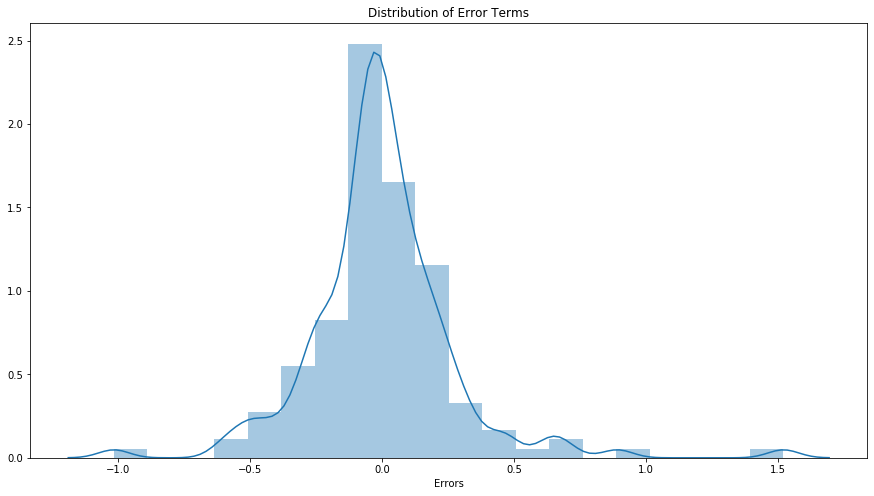

In [106]:
plt.figure(figsize = (15, 8))
sns.distplot((y_train - y_train_price), bins = 20)            
plt.xlabel('Errors')
plt.title('Distribution of Error Terms')
plt.show()

Error terms are normally distributed with a mean of 0, thus the assumptions of Linear regression still hold good for the model built.

## Making Prediction using final model

Dividing the test data into X_test and y_test

In [107]:
y_test = test_data.pop('price')
X_test = test_data

In [108]:
# Creating X_test_updated dataframe by dropping variables from X_test - Significant attributes must be obtained
X_test_updated = X_test[X_train_updated.columns]

# Adding a constant variable 
X_test_updated = sm.add_constant(X_test_updated)

In [109]:
X_test_updated.columns

Index(['const', 'enginelocation', 'carwidth', 'cylindernumber', 'horsepower',
       'expensive_price', 'moderate_price', 'hatchback', 'rotor', 'idi'],
      dtype='object')

In [110]:
# Making predictions using the final model - Model 13
y_pred = lr_model.predict(X_test_updated)

## Model Evaluation

Plotting a graph for actual versus predicted values.

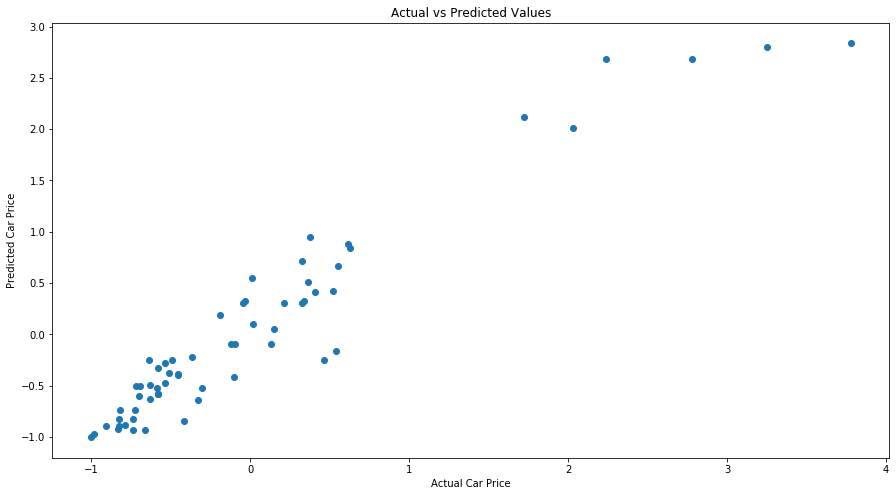

In [111]:
# Plotting y_test and y_pred to understand the spread

plt.figure(figsize = (15, 8))
plt.scatter(y_test, y_pred)           
plt.xlabel('Actual Car Price')             
plt.ylabel('Predicted Car Price')
plt.title('Actual vs Predicted Values')
plt.show()

## R-squared score on the test dataset

In [112]:
r2_score(y_test, y_pred)

0.9201500737069737

# We obtained a model with R-squared score on the testing data : <font color='red'>0.920</font>

Equation of the best fitted line is:

$ price = 0.71 \times enginelocation + 0.23 \times carwidth + 0.09 \times cylindernumber + 0.29 \times horsepower + 1.42 \times expensiveprice + 0.38 \times moderateprice - 0.14 \times hatchback + 0.51 \times rotor + 0.25 \times idi $


### R-squared scores:
- R-squared score on the **training** data : <font color='red'>0.924</font>
- R-squared score on the **testing** data : <font color='red'>0.920</font>

### Inferences:

Driving variables:
- enginelocation (front - 0, rear - 1)
- carwidth
- cylindernumber
- horsepower
- expensive_price
- moderate_price 
- hatchback (car body is hatchback)
- rotor (enginetype is rotor)
- idi (fuelsystem is idi)

To produce high priced cars, the following are the features which must be taken into consideration:
- Engine located at the rear
- Higher car width
- Higher cylinder numbers
- Higher horsepower
- Car body should be hatchback design
- Engine type should not be rotor
- Fuel system must be idi
- Pricing must be in the range of cars produced by expensive and moderate price class companies

To produce low priced cars, the following are the features which must be taken into consideration:
- Engine located at the front
- Lower car width
- Lower cylinder numbers
- Lower horsepower
- Car body can be anything other than hatchback design
- Engine type should be rotor
- Fuel system must not be idi
- Pricing must be in the range of cars produced by budget price class companies

# Additional approaches and models:

I used different scaling techniques and method of eliminating the outliers for building different models, below are the R-squared scores of all the approaches best fit models. 

### R-squared scores (train / test):
| Scaling Technique | Dependent variables outliers are not eliminated | Dependent variables outliers are eliminated |
| --- | --- | --- |
| Scalar (Standardisation) | <font color='red'>**0.924 / 0.920**</font> | **0.916 / 0.782** |
| Min-Max (Normalisation) | **0.877 / 0.844** | **0.884 / 0.727** |

# Model Buidling for other approaches:
# - MinMax Scaling - Dependent variables outliers are not eliminated
## Data Splitting

In [113]:
# Splitting data into train and test sets
np.random.seed(0)
train_data, test_data = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [114]:
train_data.shape

(143, 42)

In [115]:
test_data.shape

(62, 42)

## Data Scaling
**Scaling is not applied to the dummy variables or the variables which have the value ranges between 0 and 1, as they are already in the required range**

In [116]:
# Retrieving only the columns which need to be scaled
all_cols = train_data.columns
scaling_cols = list(set(all_cols) - set(non_rescale_features))
scaling_cols

['carheight',
 'carlength',
 'stroke',
 'highwaympg',
 'price',
 'wheelbase',
 'horsepower',
 'carwidth',
 'citympg',
 'curbweight',
 'cylindernumber',
 'boreratio',
 'peakrpm',
 'compressionratio',
 'enginesize',
 'symboling']

In [117]:
# MinMax scalar
scaler = MinMaxScaler()

In [118]:
# Scaling train data
train_data[scaling_cols] = scaler.fit_transform(train_data[scaling_cols])
train_data.head()

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
122,0.6,0,0,1,0,0,0.244828,0.426016,0.291667,0.265487,...,0,0,0,1,0,0,0,0,0,0
125,1.0,0,0,0,1,0,0.272414,0.452033,0.666667,0.212389,...,0,0,0,0,0,0,0,1,0,0
166,0.6,0,0,0,1,0,0.272414,0.448780,0.308333,0.424779,...,0,0,0,0,0,0,0,1,0,0
1,1.0,0,0,0,1,0,0.068966,0.450407,0.316667,0.088496,...,0,0,0,0,0,0,0,1,0,0
199,0.2,0,1,1,1,0,0.610345,0.775610,0.575000,0.858407,...,0,0,0,0,0,0,0,1,0,0


In [119]:
train_data.describe()

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0
mean,0.559441,0.090909,0.181818,0.559441,0.349650,0.006993,0.411141,0.525476,0.461655,0.509004,...,0.083916,0.062937,0.027972,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0
std,0.239200,0.288490,0.387050,0.498199,0.478536,0.083624,0.205581,0.204848,0.184517,0.215378,...,0.278236,0.243703,0.165472,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
25%,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.272414,0.399187,0.304167,0.353982,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
50%,0.600000,0.000000,0.000000,1.000000,0.000000,0.000000,0.341379,0.502439,0.425000,0.522124,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
75%,0.600000,0.000000,0.000000,1.000000,1.000000,0.000000,0.503448,0.669919,0.550000,0.668142,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0


In [120]:
# Scaling test data
test_data[scaling_cols] = scaler.fit_transform(test_data[scaling_cols])
test_data.head()

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
160,0.4,0,0,1,0,0,0.265306,0.341732,0.200000,0.346154,...,0,0,0,1,0,0,0,0,0,0
186,0.8,0,0,1,0,0,0.311953,0.426772,0.315789,0.605769,...,0,0,0,0,0,0,0,1,0,0
59,0.6,0,0,0,0,0,0.355685,0.522835,0.421053,0.413462,...,0,0,0,1,0,0,0,0,0,0
165,0.6,0,0,0,1,0,0.230321,0.379528,0.157895,0.307692,...,0,0,0,0,0,0,0,1,0,0
140,0.8,0,0,0,0,0,0.195335,0.200000,0.136842,0.605769,...,1,0,0,1,0,0,0,0,0,0


In [121]:
test_data.describe()

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.0,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.583871,0.112903,0.177419,0.564516,0.419355,0.032258,0.370121,0.486741,0.375212,0.454249,...,0.048387,0.064516,0.0,0.258065,0.0,0.112903,0.016129,0.500000,0.048387,0.016129
std,0.271724,0.319058,0.385142,0.499868,0.497482,0.178127,0.179970,0.183964,0.208977,0.234487,...,0.216335,0.247676,0.0,0.441142,0.0,0.319058,0.127000,0.504082,0.216335,0.127000
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.265306,0.389764,0.221053,0.264423,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.600000,0.000000,0.000000,1.000000,0.000000,0.000000,0.327988,0.475591,0.326316,0.485577,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.500000,0.000000,0.000000
75%,0.800000,0.000000,0.000000,1.000000,1.000000,0.000000,0.482507,0.642126,0.421053,0.605769,...,0.000000,0.000000,0.0,0.750000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


## Model Building 
Using the statsmodel for model generation. 

In [122]:
# Seperating out the dependent variable
y_train = train_data.pop('price')
X_train = train_data

### Model 1 - With all attributes considered

In [123]:
model_building_stats(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     55.03
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           1.33e-53
Time:                        08:55:27   Log-Likelihood:                 234.99
No. Observations:                 143   AIC:                            -392.0
Df Residuals:                     104   BIC:                            -276.4
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0995      0.114  

From the above stats we can observe that **Model 1** which is built with all attributes have very high multicollinearity as we have very high p-values and VIF values.

VIF values is infinite for few attributes, which means that these attributes have exact linear corellation with others.

### Getting top 20 significant attributes using RFE method

In [124]:
lm = LinearRegression()
lm.fit(X_train, y_train)

# Choosing 20 attributes
rfe = RFE(lm, 20)
rfe = rfe.fit(X_train, y_train)

In [125]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('symboling', False, 10),
 ('fueltype', False, 3),
 ('aspiration', False, 9),
 ('doornumber', False, 20),
 ('drivewheel', False, 12),
 ('enginelocation', True, 1),
 ('wheelbase', True, 1),
 ('carlength', False, 4),
 ('carwidth', True, 1),
 ('carheight', False, 11),
 ('curbweight', True, 1),
 ('cylindernumber', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 2),
 ('horsepower', True, 1),
 ('peakrpm', False, 5),
 ('citympg', True, 1),
 ('highwaympg', False, 7),
 ('risky_car', False, 15),
 ('safe_car', False, 19),
 ('expensive_price', True, 1),
 ('moderate_price', True, 1),
 ('hardtop', True, 1),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('dohcv', False, 17),
 ('l', False, 8),
 ('ohc', True, 1),
 ('ohcf', True, 1),
 ('ohcv', False, 18),
 ('rotor', True, 1),
 ('2bbl', False, 13),
 ('4bbl', False, 16),
 ('idi', True, 1),
 ('mfi', False, 21),
 ('mpfi', False, 14),
 ('spdi', False, 6),
 ('spfi', False, 

In [126]:
# Filtering out significant attributes obtained from RFE
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
X_train_rfe.columns

Index(['enginelocation', 'wheelbase', 'carwidth', 'curbweight',
       'cylindernumber', 'enginesize', 'boreratio', 'stroke', 'horsepower',
       'citympg', 'expensive_price', 'moderate_price', 'hardtop', 'hatchback',
       'sedan', 'wagon', 'ohc', 'ohcf', 'rotor', 'idi'],
      dtype='object')

### Analysing the correlation between the top 20 significant attributes which are obtained from RFE method

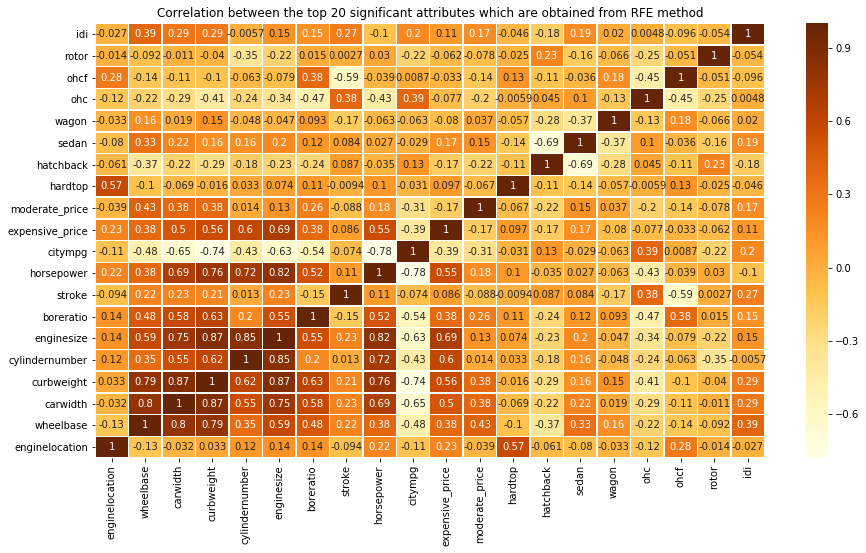

In [127]:
# Plotting a heat map
plt.figure(figsize = (15,8))
ax = sns.heatmap(X_train_rfe.corr(), annot = True, linewidth = 0.5, cmap = "YlOrBr")
t, bot = ax.get_ylim()
ax.set_ylim(top = t + 0.5, bottom = bot - 0.5)
plt.title('Correlation between the top 20 significant attributes which are obtained from RFE method')
plt.show()

From the above heatmap, we can observe that **enginesize, cylindernumber, curbweight, carwidth, wheelbase, horsepower** are highly correlated to each other. Let us now build a model using these 20 obtained attributes from RFE and analyse their VIF values.

## Model 2 - With top 20 significant attributes obtained from RFE

In [128]:
model_building_stats(X_train_rfe, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     111.3
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           1.81e-68
Time:                        08:55:28   Log-Likelihood:                 228.41
No. Observations:                 143   AIC:                            -414.8
Df Residuals:                     122   BIC:                            -352.6
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0623      0.075     

Like as we observe using the heatmap, **enginesize, curbweight, cyindernumber, carwidth, wheelbase, horsepower** have high VIF values.

From the above stats, we can observe that **idi** has high p-value, thus building another model by dropping it.

### Model 3 - Dropping *idi*

In [129]:
X_train_updated = X_train_rfe.drop(['idi'], axis=1)
model_building_stats(X_train_updated, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     117.5
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           2.27e-69
Time:                        08:55:28   Log-Likelihood:                 228.03
No. Observations:                 143   AIC:                            -416.1
Df Residuals:                     123   BIC:                            -356.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0288      0.063     

From the above stats, we can observe that **wheelbase** has high p-value, thus building another model by dropping it.

### Model 4 - Dropping *wheelbase*

In [130]:
X_train_updated = X_train_updated.drop(['wheelbase'], axis=1)
model_building_stats(X_train_updated, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     122.1
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           7.91e-70
Time:                        08:55:28   Log-Likelihood:                 226.43
No. Observations:                 143   AIC:                            -414.9
Df Residuals:                     124   BIC:                            -358.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0270      0.063     

From the above stats, we can observe that **hardtop** has high p-value, thus building another model by dropping it.

### Model 5 - Dropping *hardtop*

In [131]:
X_train_updated = X_train_updated.drop(['hardtop'], axis=1)
model_building_stats(X_train_updated, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     127.6
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           2.36e-70
Time:                        08:55:28   Log-Likelihood:                 225.00
No. Observations:                 143   AIC:                            -414.0
Df Residuals:                     125   BIC:                            -360.7
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0216      0.063     

**enginelocation** and **ochf** both have high and equal p-values, so comparing the VIF values, dropping ochf

### Model 6 - Dropping *ohcf*

In [132]:
X_train_updated = X_train_updated.drop(['ohcf'], axis=1)
model_building_stats(X_train_updated, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     132.8
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           1.09e-70
Time:                        08:55:28   Log-Likelihood:                 223.05
No. Observations:                 143   AIC:                            -412.1
Df Residuals:                     126   BIC:                            -361.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0470      0.063     

From the above stats, we can observe that **sedan** has high p-value, thus building another model by dropping it.

### Model 7 - Dropping *sedan*

In [133]:
X_train_updated = X_train_updated.drop(['sedan'], axis=1)
model_building_stats(X_train_updated, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     139.8
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           3.15e-71
Time:                        08:55:28   Log-Likelihood:                 221.63
No. Observations:                 143   AIC:                            -411.3
Df Residuals:                     127   BIC:                            -363.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0317      0.062     

From the above stats, we can observe that **wagon** has high p-value, thus building another model by dropping it.

### Model 8 - Dropping *wagon*

In [134]:
X_train_updated = X_train_updated.drop(['wagon'], axis=1)
model_building_stats(X_train_updated, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     148.7
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           6.19e-72
Time:                        08:55:28   Log-Likelihood:                 220.61
No. Observations:                 143   AIC:                            -411.2
Df Residuals:                     128   BIC:                            -366.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0334      0.062     

All p-values are in considerable range, so eliminating attributes which have high VIF values - **enginesize**

### Model 9 - Dropping *enginesize*

In [135]:
X_train_updated = X_train_updated.drop(['enginesize'], axis=1)
model_building_stats(X_train_updated, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     140.1
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           2.34e-69
Time:                        08:55:28   Log-Likelihood:                 211.14
No. Observations:                 143   AIC:                            -394.3
Df Residuals:                     129   BIC:                            -352.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.1453      0.049     

From the above stats, we can observe that **stroke** has high p-value, thus building another model by dropping it.

### Model 10 - Dropping *stroke*

In [136]:
X_train_updated = X_train_updated.drop(['stroke'], axis=1)
model_building_stats(X_train_updated, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     152.7
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           2.05e-70
Time:                        08:55:28   Log-Likelihood:                 211.03
No. Observations:                 143   AIC:                            -396.1
Df Residuals:                     130   BIC:                            -357.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.1506      0.048     

From the above stats, we can observe that **cylindernumber** has high p-value, thus building another model by dropping it.

### Model 11 - Dropping *cylindernumber*

In [137]:
X_train_updated = X_train_updated.drop(['cylindernumber'], axis=1)
model_building_stats(X_train_updated, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     166.6
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           2.42e-71
Time:                        08:55:28   Log-Likelihood:                 210.53
No. Observations:                 143   AIC:                            -397.1
Df Residuals:                     131   BIC:                            -361.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.1306      0.043     

From the above stats, we can observe that **ohc** has high p-value, thus building another model by dropping it.

### Model 12 - Dropping *ohc*

In [138]:
X_train_updated = X_train_updated.drop(['ohc'], axis=1)
model_building_stats(X_train_updated, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     183.0
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           3.02e-72
Time:                        08:55:28   Log-Likelihood:                 209.93
No. Observations:                 143   AIC:                            -397.9
Df Residuals:                     132   BIC:                            -365.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.1060      0.036     

From the above stats, we can observe that **citympg** has high p-value, thus building another model by dropping it.

### Model 13 - Dropping *citympg*

In [139]:
X_train_updated = X_train_updated.drop(['citympg'], axis=1)
model_building_stats(X_train_updated, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     200.9
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           6.97e-73
Time:                        08:55:28   Log-Likelihood:                 208.61
No. Observations:                 143   AIC:                            -397.2
Df Residuals:                     133   BIC:                            -367.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0579      0.018     

From the above stats, we can observe that **hatchback** has high p-value, thus building another model by dropping it.

### Model 14 - Dropping *hatchback*

In [140]:
X_train_updated = X_train_updated.drop(['hatchback'], axis=1)
model_building_stats(X_train_updated, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     221.4
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           2.53e-73
Time:                        08:55:28   Log-Likelihood:                 206.75
No. Observations:                 143   AIC:                            -395.5
Df Residuals:                     134   BIC:                            -368.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0710      0.017     

All p-values are in considerable range, eliminating **curbweight** which has highest VIF value.

### Model 15 - Dropping *curbweight*

In [141]:
X_train_updated = X_train_updated.drop(['curbweight'], axis=1)
model_building_stats(X_train_updated, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     206.2
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           8.01e-69
Time:                        08:55:28   Log-Likelihood:                 192.75
No. Observations:                 143   AIC:                            -369.5
Df Residuals:                     135   BIC:                            -345.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0746      0.019     

From the above stats, we can observe that **boreratio** has high p-value, thus building another model by dropping it.

### Model 16 - Dropping *boreratio*

In [142]:
X_train_updated = X_train_updated.drop(['boreratio'], axis=1)
model_building_stats(X_train_updated, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     239.1
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           1.12e-69
Time:                        08:55:28   Log-Likelihood:                 191.88
No. Observations:                 143   AIC:                            -369.8
Df Residuals:                     136   BIC:                            -349.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0845      0.017     

From the above stats, we can observe that **rotor** has high p-value, thus building another model by dropping it.

### Model 17 - Dropping *rotor*

In [143]:
X_train_updated = X_train_updated.drop(['rotor'], axis=1)
model_building_stats(X_train_updated, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     283.9
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           1.93e-70
Time:                        08:55:28   Log-Likelihood:                 190.71
No. Observations:                 143   AIC:                            -369.4
Df Residuals:                     137   BIC:                            -351.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0845      0.017     

From the above stats, we can observe that **horsepower** has high VIF value, thus building another model by dropping it.

### Model 17 - Dropping *horsepower*

In [144]:
X_train_updated = X_train_updated.drop(['horsepower'], axis=1)
model_building_stats(X_train_updated, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     246.9
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           7.83e-62
Time:                        08:55:29   Log-Likelihood:                 167.02
No. Observations:                 143   AIC:                            -324.0
Df Residuals:                     138   BIC:                            -309.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0952      0.020     

Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

### Final Model

In [145]:
X_lm_updated = sm.add_constant(X_train_updated)
lr_model = sm.OLS(y_train, X_lm_updated).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     246.9
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           7.83e-62
Time:                        08:55:29   Log-Likelihood:                 167.02
No. Observations:                 143   AIC:                            -324.0
Df Residuals:                     138   BIC:                            -309.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0952      0.020     -4.712      0.000      -0.135      -0.055
enginelocation      0.3093      0.081      3.834      0.000       0.150       0.469
carwidth            0.5499      0.049     11.223      0.000       0.453       0.647
expensive_price     0.3692      0.027     13.796      0.000       0.316       0.422
moderate_price      0.0835      0.021      4.058      0.000       0.043       0.124
==============================================================================
Omnibus:                       32.946   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.648
Skew:                           0.836   Prob(JB):                     2.30e-22
Kurtosis:                       6.732   Cond. No.                         14.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Residual Analysis of training data
To check if the error terms are normally distributed, plotting the historgram of the error terms.

In [146]:
y_train_price = lr_model.predict(X_lm_updated)

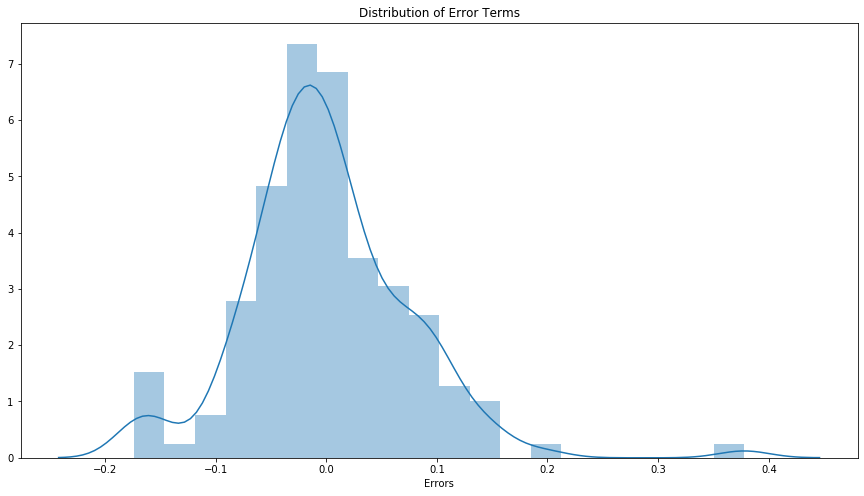

In [147]:
plt.figure(figsize = (15, 8))
sns.distplot((y_train - y_train_price), bins = 20)            
plt.xlabel('Errors')
plt.title('Distribution of Error Terms')
plt.show()

Error terms are normally distributed with a mean of 0, thus the assumptions of Linear regression still hold good for the model built.

## Making Prediction using final model
Dividing the test data into X_test and y_test

In [148]:
y_test = test_data.pop('price')
X_test = test_data

In [149]:
# Creating X_test_updated dataframe by dropping variables from X_test - Significant attributes must be obtained
X_test_updated = X_test[X_train_updated.columns]

# Adding a constant variable 
X_test_updated = sm.add_constant(X_test_updated)

# Making predictions using the final model
y_pred = lr_model.predict(X_test_updated)

## Model Evaluation

Plotting a graph for actual versus predicted values.

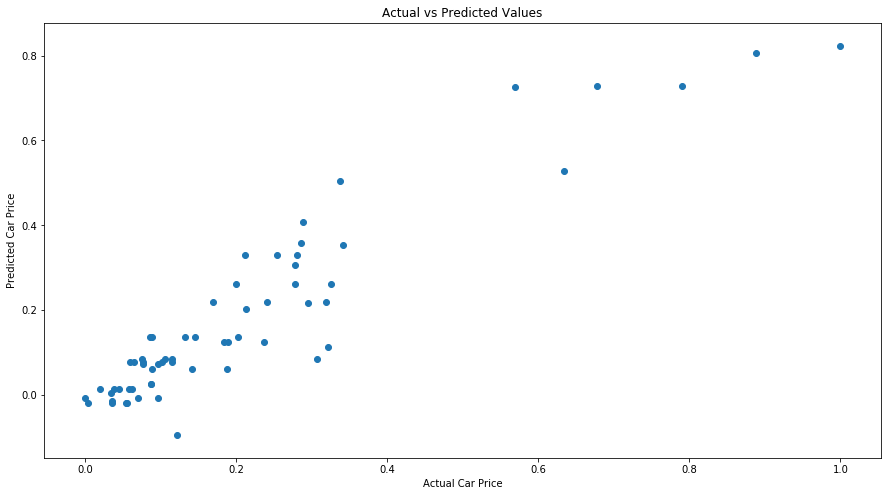

In [150]:
# Plotting y_test and y_pred to understand the spread

plt.figure(figsize = (15, 8))
plt.scatter(y_test, y_pred)           
plt.xlabel('Actual Car Price')             
plt.ylabel('Predicted Car Price')
plt.title('Actual vs Predicted Values')
plt.show()

## R-squared score on the test dataset

In [151]:
r2_score(y_test, y_pred)

0.8437365610592168

### R-squared scores:
- R-squared score on the **training** data : <font color='red'>0.877</font>
- R-squared score on the **testing** data : <font color='red'>0.844</font>

# - Scalar Scaling - Dependent variables outliers are eliminated
## Data Splitting

In [152]:
# Splitting data into train and test sets
np.random.seed(0)
train_data, test_data = train_test_split(data1, train_size = 0.7, test_size = 0.3, random_state = 100)

In [153]:
train_data.shape

(133, 42)

In [154]:
test_data.shape

(57, 42)

## Data Scaling
**Scaling is not applied to the dummy variables or the variables which have the value ranges between 0 and 1, as standard scaling affects such variables.**

In [155]:
# Retrieving only the columns which need to be scaled
all_cols = train_data.columns
scaling_cols = list(set(all_cols) - set(non_rescale_features))
scaling_cols

['carheight',
 'carlength',
 'stroke',
 'highwaympg',
 'price',
 'wheelbase',
 'horsepower',
 'carwidth',
 'citympg',
 'curbweight',
 'cylindernumber',
 'boreratio',
 'peakrpm',
 'compressionratio',
 'enginesize',
 'symboling']

In [156]:
# Standar scalar
scaler = StandardScaler()

In [157]:
# Scaling train data
train_data[scaling_cols] = scaler.fit_transform(train_data[scaling_cols])
train_data.head()

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
180,-1.432877,0,0,1,1,0,1.141397,1.298024,0.444764,0.118170,...,0,0,0,0,0,0,0,1,0,0
76,1.020848,0,0,0,0,0,-0.902106,-1.387463,-0.714029,-1.184962,...,0,0,0,1,0,0,0,0,0,0
85,0.202940,0,0,1,0,0,-0.410152,-0.057927,-0.162223,-0.869051,...,0,0,0,1,0,0,0,0,0,0
100,-0.614968,0,0,1,0,0,-0.239860,0.030122,-0.272584,0.355103,...,0,0,0,1,0,0,0,0,0,0
92,0.202940,0,0,1,0,0,-0.750736,-0.683073,-1.045113,0.276125,...,0,0,0,1,0,0,0,0,0,0


In [158]:
train_data.describe()

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
count,1.330000e+02,133.000000,133.000000,133.000000,133.000000,133.0,1.330000e+02,1.330000e+02,1.330000e+02,1.330000e+02,...,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.0,133.000000,133.000000,133.000000
mean,7.095410e-18,0.112782,0.210526,0.586466,0.315789,0.0,-2.237141e-16,1.752984e-15,5.683006e-15,-1.043443e-16,...,0.067669,0.052632,0.030075,0.353383,0.022556,0.112782,0.0,0.398496,0.052632,0.007519
std,1.003781e+00,0.317522,0.409224,0.494329,0.466587,0.0,1.003781e+00,1.003781e+00,1.003781e+00,1.003781e+00,...,0.252127,0.224141,0.171440,0.479828,0.149046,0.317522,0.0,0.491440,0.224141,0.086711
min,-2.250785e+00,0.000000,0.000000,0.000000,0.000000,0.0,-2.245521e+00,-2.505681e+00,-1.762462e+00,-1.974738e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,-6.149685e-01,0.000000,0.000000,0.000000,0.000000,0.0,-7.507357e-01,-5.950240e-01,-9.347521e-01,-7.110958e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,2.029396e-01,0.000000,0.000000,1.000000,0.000000,0.0,-2.966238e-01,-5.097558e-03,-1.622228e-01,1.181696e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,1.020848e+00,0.000000,0.000000,1.000000,1.000000,0.0,3.656227e-01,4.791704e-01,4.447644e-01,6.710132e-01,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000
max,1.838756e+00,1.000000,1.000000,1.000000,1.000000,0.0,2.976766e+00,2.275364e+00,3.148617e+00,2.369033e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


In [159]:
# Scaling test data
test_data[scaling_cols] = scaler.fit_transform(test_data[scaling_cols])
test_data.head()

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
176,-1.677113,0,0,1,0,0,0.879302,0.297676,0.528216,0.587722,...,0,0,0,0,0,0,0,1,0,0
88,-1.677113,0,0,1,0,0,-0.294338,0.014441,-0.051804,-0.962776,...,0,0,0,0,0,0,0,0,1,0
11,-0.853015,0,0,1,1,0,0.648422,0.403889,-0.368178,0.305813,...,0,0,0,0,0,0,0,1,0,0
173,-1.677113,0,0,1,0,0,0.879302,0.297676,0.528216,0.587722,...,0,0,0,0,0,0,0,1,0,0
179,1.619282,0,0,0,1,0,0.975502,0.996912,1.160965,-0.774837,...,0,0,0,0,0,0,0,1,0,0


In [160]:
test_data.describe()

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
count,5.700000e+01,57.000000,57.000000,57.000000,57.000000,57.0,5.700000e+01,5.700000e+01,5.700000e+01,5.700000e+01,...,57.000000,57.000000,57.0,57.000000,57.0,57.000000,57.000000,57.000000,57.000000,57.0
mean,-1.363432e-16,0.070175,0.140351,0.526316,0.333333,0.0,-5.142086e-16,5.005742e-16,1.686760e-15,1.643909e-15,...,0.052632,0.017544,0.0,0.333333,0.0,0.070175,0.017544,0.473684,0.035088,0.0
std,1.008889e+00,0.257713,0.350438,0.503745,0.475595,0.0,1.008889e+00,1.008889e+00,1.008889e+00,1.008889e+00,...,0.225282,0.132453,0.0,0.475595,0.0,0.257713,0.132453,0.503745,0.185637,0.0
min,-1.677113e+00,0.000000,0.000000,0.000000,0.000000,0.0,-2.160620e+00,-2.755949e+00,-2.740986e+00,-2.278350e+00,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
25%,-8.530145e-01,0.000000,0.000000,0.000000,0.000000,0.0,-6.406587e-01,-5.254751e-01,-7.900109e-01,-7.748368e-01,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
50%,-2.891575e-02,0.000000,0.000000,1.000000,0.000000,0.0,-2.943384e-01,-2.096310e-02,-5.180400e-02,-7.006503e-02,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
75%,7.951830e-01,0.000000,0.000000,1.000000,1.000000,0.0,4.945021e-01,4.038891e-01,5.282157e-01,6.816915e-01,...,0.000000,0.000000,0.0,1.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.0
max,1.619282e+00,1.000000,1.000000,1.000000,1.000000,0.0,3.149624e+00,2.359980e+00,3.111940e+00,2.561083e+00,...,1.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0


## Model Building 
Using the statsmodel for model generation. 

In [161]:
# Seperating out the dependent variable
y_train = train_data.pop('price')
X_train = train_data

### Model 1 - With all attributes considered

In [162]:
model_building_stats(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     48.19
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           3.50e-47
Time:                        08:55:29   Log-Likelihood:                 9.7234
No. Observations:                 133   AIC:                             56.55
Df Residuals:                      95   BIC:                             166.4
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.4097      0.327  

From the above stats we can observe that **Model 1** which is built with all attributes have very high multicollinearity as we have very high p-values and VIF values.

VIF values is infinite for few attributes, which means that these attributes have exact linear corellation with others.

### Getting top 20 significant attributes using RFE method

In [163]:
lm = LinearRegression()
lm.fit(X_train, y_train)

# Choosing 20 attributes
rfe = RFE(lm, 20)
rfe = rfe.fit(X_train, y_train)

In [164]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('symboling', True, 1),
 ('fueltype', False, 8),
 ('aspiration', True, 1),
 ('doornumber', True, 1),
 ('drivewheel', True, 1),
 ('enginelocation', False, 20),
 ('wheelbase', True, 1),
 ('carlength', False, 3),
 ('carwidth', True, 1),
 ('carheight', False, 14),
 ('curbweight', True, 1),
 ('cylindernumber', True, 1),
 ('enginesize', False, 11),
 ('boreratio', False, 10),
 ('stroke', False, 18),
 ('compressionratio', False, 19),
 ('horsepower', False, 7),
 ('peakrpm', False, 15),
 ('citympg', False, 17),
 ('highwaympg', False, 9),
 ('risky_car', True, 1),
 ('safe_car', True, 1),
 ('expensive_price', True, 1),
 ('moderate_price', True, 1),
 ('hardtop', True, 1),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('dohcv', False, 21),
 ('l', True, 1),
 ('ohc', False, 13),
 ('ohcf', False, 16),
 ('ohcv', False, 12),
 ('rotor', True, 1),
 ('2bbl', False, 5),
 ('4bbl', True, 1),
 ('idi', False, 4),
 ('mfi', False, 22),
 ('mpfi', False, 6),
 ('spdi', True, 1),
 ('spfi', False,

In [165]:
# Filtering out significant attributes obtained from RFE
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
X_train_rfe.columns

Index(['symboling', 'aspiration', 'doornumber', 'drivewheel', 'wheelbase',
       'carwidth', 'curbweight', 'cylindernumber', 'risky_car', 'safe_car',
       'expensive_price', 'moderate_price', 'hardtop', 'hatchback', 'sedan',
       'wagon', 'l', 'rotor', '4bbl', 'spdi'],
      dtype='object')

### Analysing the correlation between the top 20 significant attributes which are obtained from RFE method

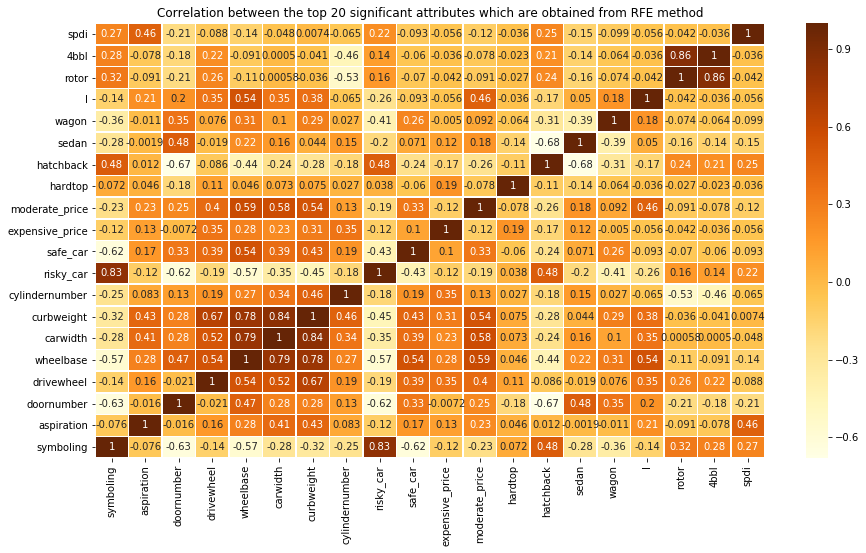

In [166]:
# Plotting a heat map
plt.figure(figsize = (15,8))
ax = sns.heatmap(X_train_rfe.corr(), annot = True, linewidth = 0.5, cmap = "YlOrBr")
t, bot = ax.get_ylim()
ax.set_ylim(top = t + 0.5, bottom = bot - 0.5)
plt.title('Correlation between the top 20 significant attributes which are obtained from RFE method')
plt.show()

From the above heatmap, we can observe that **risky_car and symboling, 4bbl and rotor, curbweight, carwidth, wheelbase** are highly correlated. Let us now build a model using these 20 attributes and analyse their VIF values.

## Model 2 - With top 20 significant attributes obtained from RFE

In [167]:
model_building_stats(X_train_rfe, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     96.78
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           4.13e-61
Time:                        08:55:31   Log-Likelihood:                 4.5220
No. Observations:                 133   AIC:                             32.96
Df Residuals:                     112   BIC:                             93.65
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2029      0.212     

Like from our observations in the heatmap, **risky_car, curbweight, wheelbase, symboling, carwidth** have high VIF values.

From the above stats, we can observe that **doornumber** has high p-value, thus building another model by dropping it.

### Model 3 - Dropping *doornumber*

In [168]:
X_train_updated = X_train_rfe.drop(['doornumber'], axis=1)
model_building_stats(X_train_updated, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     101.0
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           1.01e-61
Time:                        08:55:31   Log-Likelihood:                 3.4221
No. Observations:                 133   AIC:                             33.16
Df Residuals:                     113   BIC:                             90.96
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2547      0.209     

From the above stats, we can observe that **hardtop** has high p-value, thus building another model by dropping it.

### Model 4 - Dropping *hardtop*

In [169]:
X_train_updated = X_train_updated.drop(['hardtop'], axis=1)
model_building_stats(X_train_updated, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     105.3
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           3.00e-62
Time:                        08:55:31   Log-Likelihood:                 2.0816
No. Observations:                 133   AIC:                             33.84
Df Residuals:                     114   BIC:                             88.75
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0101      0.134     

From the above stats, we can observe that **sedan** has high p-value, thus building another model by dropping it.

### Model 5 - Dropping *sedan*

In [170]:
X_train_updated = X_train_updated.drop(['sedan'], axis=1)
model_building_stats(X_train_updated, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     111.5
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           4.41e-63
Time:                        08:55:31   Log-Likelihood:                 1.5452
No. Observations:                 133   AIC:                             32.91
Df Residuals:                     115   BIC:                             84.94
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.1037      0.063     

From the above stats, we can observe that **safe_car** has high p-value, thus building another model by dropping it.

### Model 6 - Dropping *safe_car*

In [171]:
X_train_updated = X_train_updated.drop(['safe_car'], axis=1)
model_building_stats(X_train_updated, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     117.2
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           1.14e-63
Time:                        08:55:31   Log-Likelihood:                0.32883
No. Observations:                 133   AIC:                             33.34
Df Residuals:                     116   BIC:                             82.48
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0970      0.063     

From the above stats, we can observe that **hatchback** has high p-value, thus building another model by dropping it.

### Model 7 - Dropping *hatchback*

In [172]:
X_train_updated = X_train_updated.drop(['hatchback'], axis=1)
model_building_stats(X_train_updated, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     122.6
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           4.54e-64
Time:                        08:55:31   Log-Likelihood:                -1.4125
No. Observations:                 133   AIC:                             34.82
Df Residuals:                     117   BIC:                             81.07
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.1180      0.063     

From the above stats, we can observe that **wagon** has high p-value, thus building another model by dropping it.

### Model 8 - Dropping *wagon*

In [173]:
X_train_updated = X_train_updated.drop(['wagon'], axis=1)
model_building_stats(X_train_updated, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     128.5
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           2.05e-64
Time:                        08:55:31   Log-Likelihood:                -3.3064
No. Observations:                 133   AIC:                             36.61
Df Residuals:                     118   BIC:                             79.97
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.1592      0.059     

From the above stats, we can observe that **spdi** has high p-value, thus building another model by dropping it.

### Model 9 - Dropping *spdi*

In [174]:
X_train_updated = X_train_updated.drop(['spdi'], axis=1)
model_building_stats(X_train_updated, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     135.3
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           9.83e-65
Time:                        08:55:31   Log-Likelihood:                -5.2799
No. Observations:                 133   AIC:                             38.56
Df Residuals:                     119   BIC:                             79.02
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.1649      0.060     

From the above stats, we can observe that **wheelbase** has high p-value, thus building another model by dropping it.

### Model 10 - Dropping *wheelbase*

In [175]:
X_train_updated = X_train_updated.drop(['wheelbase'], axis=1)
model_building_stats(X_train_updated, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     143.9
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           3.40e-65
Time:                        08:55:31   Log-Likelihood:                -6.9070
No. Observations:                 133   AIC:                             39.81
Df Residuals:                     120   BIC:                             77.39
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.1854      0.059     

All the p-values are in considerable range, dropping off attribute with highest VIF.

From the above stats, we can observe that **curbweight** has high VIF, thus building another model by dropping it.

### Model 11 - Dropping *curbweight*

In [176]:
X_train_updated = X_train_updated.drop(['curbweight'], axis=1)
model_building_stats(X_train_updated, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     143.1
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           7.69e-64
Time:                        08:55:31   Log-Likelihood:                -13.180
No. Observations:                 133   AIC:                             50.36
Df Residuals:                     121   BIC:                             85.04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.1755      0.062     

From the above stats, we can observe that **rotor** has high VIF, thus building another model by dropping it.

### Model 12 - Dropping *rotor*

In [177]:
X_train_updated = X_train_updated.drop(['rotor'], axis=1)
model_building_stats(X_train_updated, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     136.6
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           2.64e-61
Time:                        08:55:31   Log-Likelihood:                -22.385
No. Observations:                 133   AIC:                             66.77
Df Residuals:                     122   BIC:                             98.56
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.1446      0.065     

From the above stats, we can observe that **4bbl** has high p-value, thus building another model by dropping it.

### Model 13 - Dropping *4bbl*

In [178]:
X_train_updated = X_train_updated.drop(['4bbl'], axis=1)
model_building_stats(X_train_updated, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     149.8
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           6.77e-62
Time:                        08:55:31   Log-Likelihood:                -23.674
No. Observations:                 133   AIC:                             67.35
Df Residuals:                     123   BIC:                             96.25
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.1309      0.065     

Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

### Final Model

In [179]:
X_lm_updated = sm.add_constant(X_train_updated)
lr_model = sm.OLS(y_train, X_lm_updated).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     149.8
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           6.77e-62
Time:                        08:55:31   Log-Likelihood:                -23.674
No. Observations:                 133   AIC:                             67.35
Df Residuals:                     123   BIC:                             96.25
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.1309      0.065     -2.015      0.046      -0.260      -0.002
symboling           0.2344      0.049      4.822      0.000       0.138       0.331
aspiration          0.3388      0.071      4.780      0.000       0.199       0.479
drivewheel          0.5313      0.073      7.322      0.000       0.388       0.675
carwidth            0.4151      0.040     10.302      0.000       0.335       0.495
cylindernumber      0.1588      0.030      5.246      0.000       0.099       0.219
risky_car          -0.4844      0.099     -4.870      0.000      -0.681      -0.288
expensive_price     1.3498      0.142      9.504      0.000       1.069       1.631
moderate_price      0.6027      0.091      6.610      0.000       0.422       0.783
l                  -0.8337      0.142     -5.888      0.000      -1.114      -0.553
==============================================================================
Omnibus:                        7.583   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                7.906
Skew:                           0.431   Prob(JB):                       0.0192
Kurtosis:                       3.827   Cond. No.                         7.80
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Residual Analysis of training data
To check if the error terms are normally distributed, plotting the historgram of the error terms.

In [180]:
y_train_price = lr_model.predict(X_lm_updated)

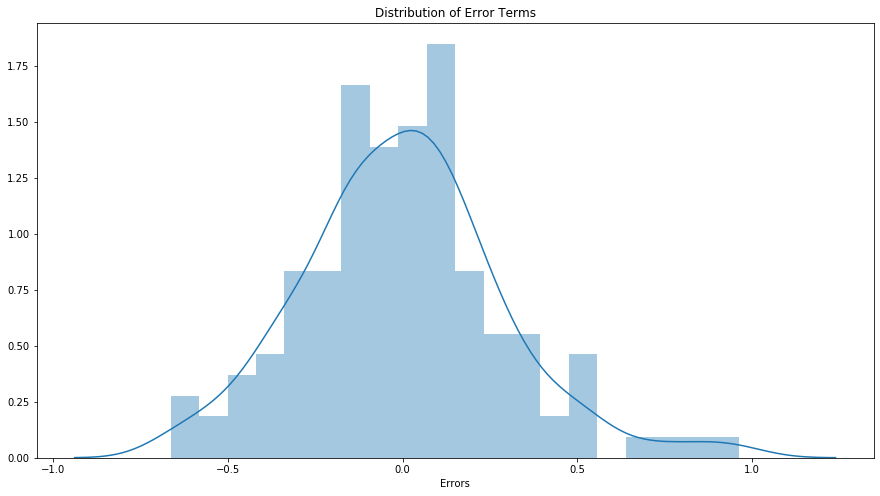

In [181]:
plt.figure(figsize = (15, 8))
sns.distplot((y_train - y_train_price), bins = 20)            
plt.xlabel('Errors')
plt.title('Distribution of Error Terms')
plt.show()

Error terms are normally distributed with a mean of 0, thus the assumptions of Linear regression still hold good for the model built.

## Making Prediction using final model
Dividing the test data into X_test and y_test

In [182]:
y_test = test_data.pop('price')
X_test = test_data

In [183]:
# Creating X_test_updated dataframe by dropping variables from X_test - Significant attributes must be obtained
X_test_updated = X_test[X_train_updated.columns]

# Adding a constant variable 
X_test_updated = sm.add_constant(X_test_updated)

# Making predictions using the final model 
y_pred = lr_model.predict(X_test_updated)

## Model Evaluation

Plotting a graph for actual versus predicted values.

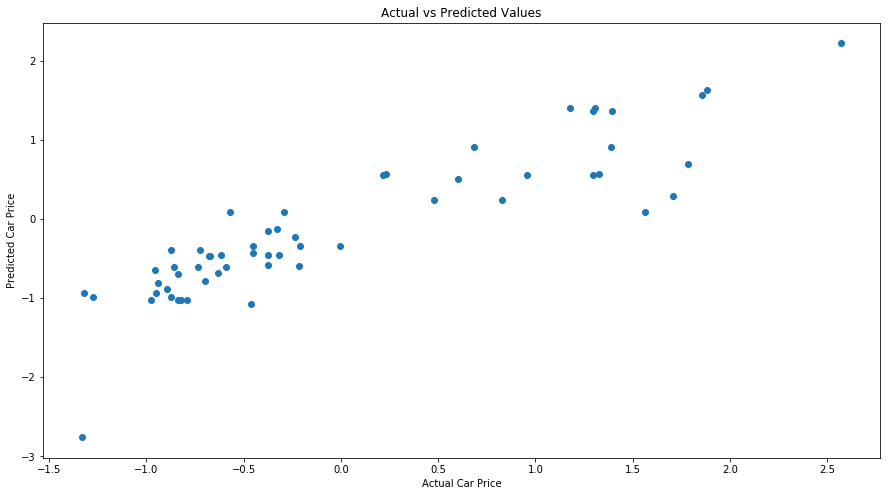

In [184]:
# Plotting y_test and y_pred to understand the spread

plt.figure(figsize = (15, 8))
plt.scatter(y_test, y_pred)           
plt.xlabel('Actual Car Price')             
plt.ylabel('Predicted Car Price')
plt.title('Actual vs Predicted Values')
plt.show()

## R-squared score on the test dataset

In [185]:
r2_score(y_test, y_pred)

0.7824947514436962

### R-squared scores:
- R-squared score on the **training** data : <font color='red'>0.916</font>
- R-squared score on the **testing** data : <font color='red'>0.782</font>

# - MinMax Scaling - Dependent variables outliers are eliminated
## Data Splitting

In [186]:
# Splitting data into train and test sets
np.random.seed(0)
train_data, test_data = train_test_split(data1, train_size = 0.7, test_size = 0.3, random_state = 100)

In [187]:
train_data.shape

(133, 42)

In [188]:
test_data.shape

(57, 42)

## Data Scaling
**Scaling is not applied to the dummy variables or the variables which have the value ranges between 0 and 1, as they are already in the considerable range.**

In [189]:
# Retrieving only the columns which need to be scaled
all_cols = train_data.columns
scaling_cols = list(set(all_cols) - set(non_rescale_features))
scaling_cols

['carheight',
 'carlength',
 'stroke',
 'highwaympg',
 'price',
 'wheelbase',
 'horsepower',
 'carwidth',
 'citympg',
 'curbweight',
 'cylindernumber',
 'boreratio',
 'peakrpm',
 'compressionratio',
 'enginesize',
 'symboling']

In [190]:
# MinMax scalar
scaler = MinMaxScaler()

In [191]:
# Scaling train data
train_data[scaling_cols] = scaler.fit_transform(train_data[scaling_cols])
train_data.head()

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
180,0.2,0,0,1,1,0,0.648551,0.795580,0.449438,0.481818,...,0,0,0,0,0,0,0,1,0,0
76,0.8,0,0,0,0,0,0.257246,0.233886,0.213483,0.181818,...,0,0,0,1,0,0,0,0,0,0
85,0.6,0,0,1,0,0,0.351449,0.511971,0.325843,0.254545,...,0,0,0,1,0,0,0,0,0,0
100,0.4,0,0,1,0,0,0.384058,0.530387,0.303371,0.536364,...,0,0,0,1,0,0,0,0,0,0
92,0.6,0,0,1,0,0,0.286232,0.381215,0.146067,0.518182,...,0,0,0,1,0,0,0,0,0,0


In [192]:
train_data.describe()

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
count,133.000000,133.000000,133.000000,133.000000,133.000000,133.0,133.000000,133.000000,133.000000,133.000000,...,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.0,133.000000,133.000000,133.000000
mean,0.550376,0.112782,0.210526,0.586466,0.315789,0.0,0.429988,0.524086,0.358875,0.454614,...,0.067669,0.052632,0.030075,0.353383,0.022556,0.112782,0.0,0.398496,0.052632,0.007519
std,0.245451,0.317522,0.409224,0.494329,0.466587,0.0,0.192211,0.209950,0.204391,0.231085,...,0.252127,0.224141,0.171440,0.479828,0.149046,0.317522,0.0,0.491440,0.224141,0.086711
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.400000,0.000000,0.000000,0.000000,0.000000,0.0,0.286232,0.399632,0.168539,0.290909,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,0.600000,0.000000,0.000000,1.000000,0.000000,0.0,0.373188,0.523020,0.325843,0.481818,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,0.800000,0.000000,0.000000,1.000000,1.000000,0.0,0.500000,0.624309,0.449438,0.609091,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


In [193]:
# Scaling test data
test_data[scaling_cols] = scaler.fit_transform(test_data[scaling_cols])
test_data.head()

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
176,0.00,0,0,1,0,0,0.572464,0.596886,0.558559,0.592233,...,0,0,0,0,0,0,0,1,0,0
88,0.00,0,0,1,0,0,0.351449,0.541522,0.459459,0.271845,...,0,0,0,0,0,0,0,0,1,0
11,0.25,0,0,1,1,0,0.528986,0.617647,0.405405,0.533981,...,0,0,0,0,0,0,0,1,0,0
173,0.00,0,0,1,0,0,0.572464,0.596886,0.558559,0.592233,...,0,0,0,0,0,0,0,1,0,0
179,1.00,0,0,0,1,0,0.590580,0.733564,0.666667,0.310680,...,0,0,0,0,0,0,0,1,0,0


In [194]:
test_data.describe()

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
count,57.000000,57.000000,57.000000,57.000000,57.000000,57.0,57.000000,57.000000,57.000000,57.000000,...,57.000000,57.000000,57.0,57.000000,57.0,57.000000,57.000000,57.000000,57.000000,57.0
mean,0.508772,0.070175,0.140351,0.526316,0.333333,0.0,0.406878,0.538700,0.468310,0.470789,...,0.052632,0.017544,0.0,0.333333,0.0,0.070175,0.017544,0.473684,0.035088,0.0
std,0.306058,0.257713,0.350438,0.503745,0.475595,0.0,0.189989,0.197205,0.172373,0.208473,...,0.225282,0.132453,0.0,0.475595,0.0,0.257713,0.132453,0.503745,0.185637,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.250000,0.000000,0.000000,0.000000,0.000000,0.0,0.286232,0.435986,0.333333,0.310680,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.500000,0.000000,0.000000,1.000000,0.000000,0.0,0.351449,0.534602,0.459459,0.456311,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
75%,0.750000,0.000000,0.000000,1.000000,1.000000,0.0,0.500000,0.617647,0.558559,0.611650,...,0.000000,0.000000,0.0,1.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0


## Model Building 
Using the statsmodel for model generation. 

In [195]:
# Seperating out the dependent variable
y_train = train_data.pop('price')
X_train = train_data

### Model 1 - With all attributes considered

In [196]:
model_building_stats(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     48.19
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           3.50e-47
Time:                        08:55:32   Log-Likelihood:                 208.65
No. Observations:                 133   AIC:                            -341.3
Df Residuals:                      95   BIC:                            -231.5
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0751      0.135  

From the above stats we can observe that **Model 1** which is built with all attributes have very high multicollinearity as we have very high p-values and VIF values.

VIF values is infinite for few attributes, which means that these attributes have exact linear corellation with others.

### Getting top 20 significant attributes using RFE method

In [197]:
lm = LinearRegression()
lm.fit(X_train, y_train)

# Choosing 20 attributes
rfe = RFE(lm, 20)
rfe = rfe.fit(X_train, y_train)

In [198]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('symboling', False, 2),
 ('fueltype', False, 13),
 ('aspiration', True, 1),
 ('doornumber', False, 5),
 ('drivewheel', True, 1),
 ('enginelocation', False, 21),
 ('wheelbase', True, 1),
 ('carlength', True, 1),
 ('carwidth', True, 1),
 ('carheight', False, 11),
 ('curbweight', True, 1),
 ('cylindernumber', True, 1),
 ('enginesize', False, 9),
 ('boreratio', True, 1),
 ('stroke', False, 17),
 ('compressionratio', False, 19),
 ('horsepower', True, 1),
 ('peakrpm', False, 12),
 ('citympg', False, 16),
 ('highwaympg', False, 4),
 ('risky_car', False, 3),
 ('safe_car', True, 1),
 ('expensive_price', True, 1),
 ('moderate_price', True, 1),
 ('hardtop', True, 1),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('dohcv', False, 20),
 ('l', True, 1),
 ('ohc', False, 15),
 ('ohcf', False, 18),
 ('ohcv', False, 14),
 ('rotor', True, 1),
 ('2bbl', False, 8),
 ('4bbl', True, 1),
 ('idi', False, 6),
 ('mfi', False, 22),
 ('mpfi', False, 10),
 ('spdi', True, 1),
 ('spfi', False,

In [199]:
# Filtering out significant attributes obtained from RFE
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
X_train_rfe.columns

Index(['aspiration', 'drivewheel', 'wheelbase', 'carlength', 'carwidth',
       'curbweight', 'cylindernumber', 'boreratio', 'horsepower', 'safe_car',
       'expensive_price', 'moderate_price', 'hardtop', 'hatchback', 'sedan',
       'wagon', 'l', 'rotor', '4bbl', 'spdi'],
      dtype='object')

### Analysing the correlation between the top 20 significant attributes which are obtained from RFE method

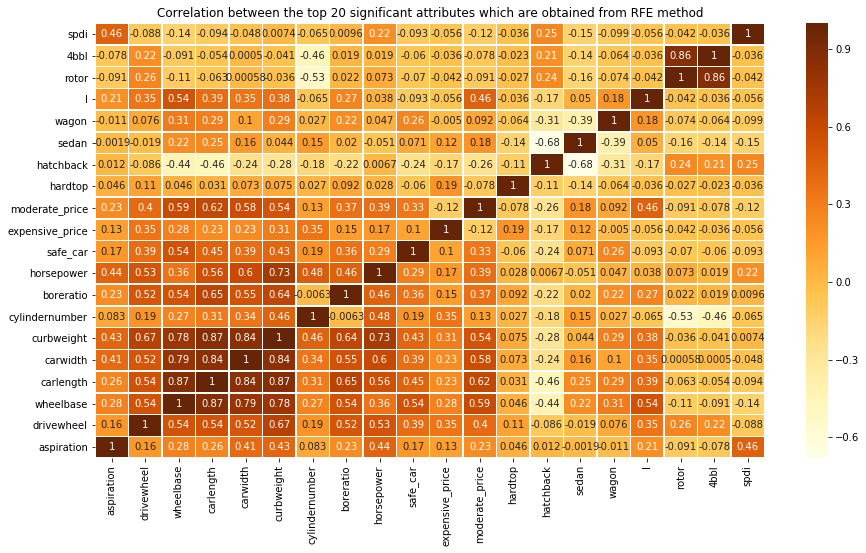

In [200]:
# Plotting a heat map
plt.figure(figsize = (15,8))
ax = sns.heatmap(X_train_rfe.corr(), annot = True, linewidth = 0.5, cmap = "YlOrBr")
t, bot = ax.get_ylim()
ax.set_ylim(top = t + 0.5, bottom = bot - 0.5)
plt.title('Correlation between the top 20 significant attributes which are obtained from RFE method')
plt.show()

From the above heatmap, we can observe that **carlength, wheelbase, carwidth, curbweight** are highly correlated. Let us now build a model using these 20 attributes obtained from RFE and check our analysis using VIF paramters.

## Model 2 - With top 20 significant attributes obtained from RFE

In [201]:
model_building_stats(X_train_rfe, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     95.84
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           6.89e-61
Time:                        08:55:33   Log-Likelihood:                 202.83
No. Observations:                 133   AIC:                            -363.7
Df Residuals:                     112   BIC:                            -303.0
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0015      0.053     

As from our observations using the above heatmap, **carlength, wheelbase, curbweight, carwidth** have high VIF values.

From the above stats, we can observe that **boreratio** has high p-value, thus building another model by dropping it.

### Model 3 - Dropping *boreratio*

In [202]:
X_train_updated = X_train_rfe.drop(['boreratio'], axis=1)
model_building_stats(X_train_updated, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     100.6
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           1.23e-61
Time:                        08:55:33   Log-Likelihood:                 202.12
No. Observations:                 133   AIC:                            -364.2
Df Residuals:                     113   BIC:                            -306.4
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0291      0.047     

From the above stats, we can observe that **carlength** has high p-value, thus building another model by dropping it.

### Model 4 - Dropping *carlength*

In [203]:
X_train_updated = X_train_updated.drop(['carlength'], axis=1)
model_building_stats(X_train_updated, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     105.0
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           3.44e-62
Time:                        08:55:33   Log-Likelihood:                 200.85
No. Observations:                 133   AIC:                            -363.7
Df Residuals:                     114   BIC:                            -308.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0462      0.046     

From the above stats, we can observe that **horsepower** has high p-value, thus building another model by dropping it.

### Model 5 - Dropping *horsepower*

In [204]:
X_train_updated = X_train_updated.drop(['horsepower'], axis=1)
model_building_stats(X_train_updated, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     110.2
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           8.45e-63
Time:                        08:55:33   Log-Likelihood:                 199.71
No. Observations:                 133   AIC:                            -363.4
Df Residuals:                     115   BIC:                            -311.4
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0529      0.046     

From the above stats, we can observe that **spdi** has high p-value, thus building another model by dropping it.

### Model 6 - Dropping *spdi*

In [205]:
X_train_updated = X_train_updated.drop(['spdi'], axis=1)
model_building_stats(X_train_updated, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     115.6
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           2.36e-63
Time:                        08:55:33   Log-Likelihood:                 198.41
No. Observations:                 133   AIC:                            -362.8
Df Residuals:                     116   BIC:                            -313.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0555      0.046     

From the above stats, we can observe that **hardtop** has high p-value, thus building another model by dropping it.

### Model 7 - Dropping *hardtop*

In [206]:
X_train_updated = X_train_updated.drop(['hardtop'], axis=1)
model_building_stats(X_train_updated, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     120.4
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           1.21e-63
Time:                        08:55:33   Log-Likelihood:                 196.39
No. Observations:                 133   AIC:                            -360.8
Df Residuals:                     117   BIC:                            -314.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.1099      0.037     

From the above stats, we can observe that **sedan** has high p-value, thus building another model by dropping it.

### Model 8 - Dropping *sedan*

In [207]:
X_train_updated = X_train_updated.drop(['sedan'], axis=1)
model_building_stats(X_train_updated, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     127.4
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           3.41e-64
Time:                        08:55:33   Log-Likelihood:                 195.04
No. Observations:                 133   AIC:                            -360.1
Df Residuals:                     118   BIC:                            -316.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.1417      0.030     

From the above stats, we can observe that **wagon** has high p-value, thus building another model by dropping it.

### Model 9 - Dropping *wagon*

In [208]:
X_train_updated = X_train_updated.drop(['wagon'], axis=1)
model_building_stats(X_train_updated, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     134.6
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           1.29e-64
Time:                        08:55:33   Log-Likelihood:                 193.34
No. Observations:                 133   AIC:                            -358.7
Df Residuals:                     119   BIC:                            -318.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.1466      0.031     

From the above stats, we can observe that **hatchback** has high p-value, thus building another model by dropping it.

### Model 10 - Dropping *hatchback*

In [209]:
X_train_updated = X_train_updated.drop(['hatchback'], axis=1)
model_building_stats(X_train_updated, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     143.5
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           4.10e-65
Time:                        08:55:33   Log-Likelihood:                 191.81
No. Observations:                 133   AIC:                            -357.6
Df Residuals:                     120   BIC:                            -320.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.1627      0.029     

From the above stats, we can observe that **4bbl** has high p-value, thus building another model by dropping it.

### Model 11 - Dropping *4bbl*

In [210]:
X_train_updated = X_train_updated.drop(['4bbl'], axis=1)
model_building_stats(X_train_updated, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     152.6
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           2.08e-65
Time:                        08:55:34   Log-Likelihood:                 189.73
No. Observations:                 133   AIC:                            -355.5
Df Residuals:                     121   BIC:                            -320.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.1620      0.030     

From the above stats, we can observe that **wheelbase** has high VIF value, thus building another model by dropping it.

### Model 12 - Dropping *wheelbase*

In [211]:
X_train_updated = X_train_updated.drop(['wheelbase'], axis=1)
model_building_stats(X_train_updated, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     162.9
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           1.37e-65
Time:                        08:55:34   Log-Likelihood:                 187.35
No. Observations:                 133   AIC:                            -352.7
Df Residuals:                     122   BIC:                            -320.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.1210      0.023     

From the above stats, we can observe that **safe_car** has high p-value, thus building another model by dropping it.

### Model 13 - Dropping *safe_car*

In [212]:
X_train_updated = X_train_updated.drop(['safe_car'], axis=1)
model_building_stats(X_train_updated, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     177.0
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           5.65e-66
Time:                        08:55:34   Log-Likelihood:                 185.45
No. Observations:                 133   AIC:                            -350.9
Df Residuals:                     123   BIC:                            -322.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.1239      0.023     

From the above stats, we can observe that **curbweight** has high VIF value, thus building another model by dropping it.

### Model 14 - Dropping *curbweight*

In [213]:
X_train_updated = X_train_updated.drop(['curbweight'], axis=1)
model_building_stats(X_train_updated, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     164.6
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           3.00e-62
Time:                        08:55:34   Log-Likelihood:                 173.33
No. Observations:                 133   AIC:                            -328.7
Df Residuals:                     124   BIC:                            -302.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.1334      0.025     

From the above stats, we can observe that **cylindernumber** has high VIF value, thus building another model by dropping it. Curbweight is proportional to the carwidth as we observe from the pairplots earlier.

### Model 15 - Dropping *cylindernumber*

In [214]:
X_train_updated = X_train_updated.drop(['cylindernumber'], axis=1)
model_building_stats(X_train_updated, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     137.0
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           1.71e-55
Time:                        08:55:34   Log-Likelihood:                 153.86
No. Observations:                 133   AIC:                            -291.7
Df Residuals:                     125   BIC:                            -268.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0042      0.015     

From the above stats, we can observe that **rotor** has high p-value, thus building another model by dropping it.

### Model 16 - Dropping *rotor*

In [215]:
X_train_updated = X_train_updated.drop(['rotor'], axis=1)
model_building_stats(X_train_updated, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     160.6
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           1.56e-56
Time:                        08:55:34   Log-Likelihood:                 153.66
No. Observations:                 133   AIC:                            -293.3
Df Residuals:                     126   BIC:                            -273.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0044      0.015     

Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

### Final Model

In [216]:
X_lm_updated = sm.add_constant(X_train_updated)
lr_model = sm.OLS(y_train, X_lm_updated).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     160.6
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           1.56e-56
Time:                        08:55:34   Log-Likelihood:                 153.66
No. Observations:                 133   AIC:                            -293.3
Df Residuals:                     126   BIC:                            -273.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0044      0.015      0.301      0.764      -0.025       0.034
aspiration          0.0706      0.018      3.839      0.000       0.034       0.107
drivewheel          0.1172      0.019      6.223      0.000       0.080       0.155
carwidth            0.5513      0.048     11.455      0.000       0.456       0.647
expensive_price     0.3391      0.035      9.571      0.000       0.269       0.409
moderate_price      0.1184      0.023      5.137      0.000       0.073       0.164
l                  -0.1802      0.035     -5.099      0.000      -0.250      -0.110
==============================================================================
Omnibus:                        3.982   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.137   Jarque-Bera (JB):                3.429
Skew:                           0.358   Prob(JB):                        0.180
Kurtosis:                       3.326   Cond. No.                         9.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Residual Analysis of training data
To check if the error terms are normally distributed, plotting the historgram of the error terms.

In [217]:
y_train_price = lr_model.predict(X_lm_updated)

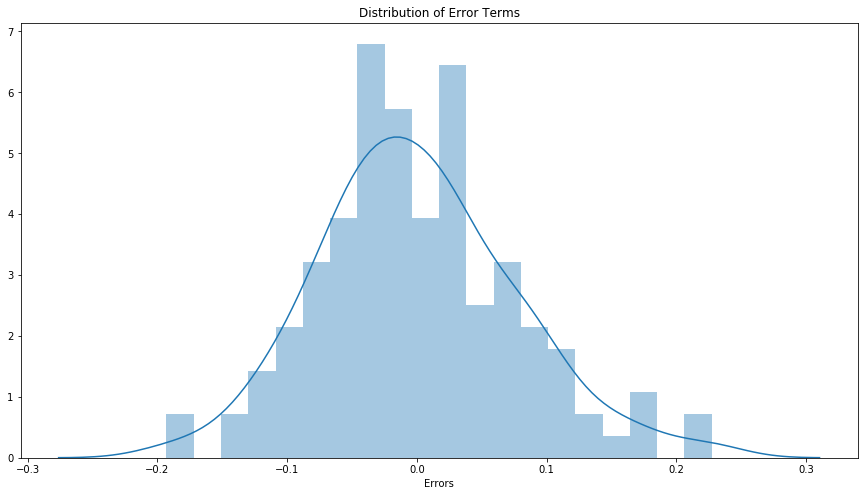

In [218]:
plt.figure(figsize = (15, 8))
sns.distplot((y_train - y_train_price), bins = 20)            
plt.xlabel('Errors')
plt.title('Distribution of Error Terms')
plt.show()

Error terms are normally distributed with a mean of 0, thus the assumptions of Linear regression still hold good for the model built.

## Making Prediction using final model
Dividing the test data into X_test and y_test

In [219]:
y_test = test_data.pop('price')
X_test = test_data

In [220]:
# Creating X_test_updated dataframe by dropping variables from X_test - Significant attributes must be obtained
X_test_updated = X_test[X_train_updated.columns]

# Adding a constant variable 
X_test_updated = sm.add_constant(X_test_updated)

# Making predictions using the final model - Model 13
y_pred = lr_model.predict(X_test_updated)

## Model Evaluation

Plotting a graph for actual versus predicted values.

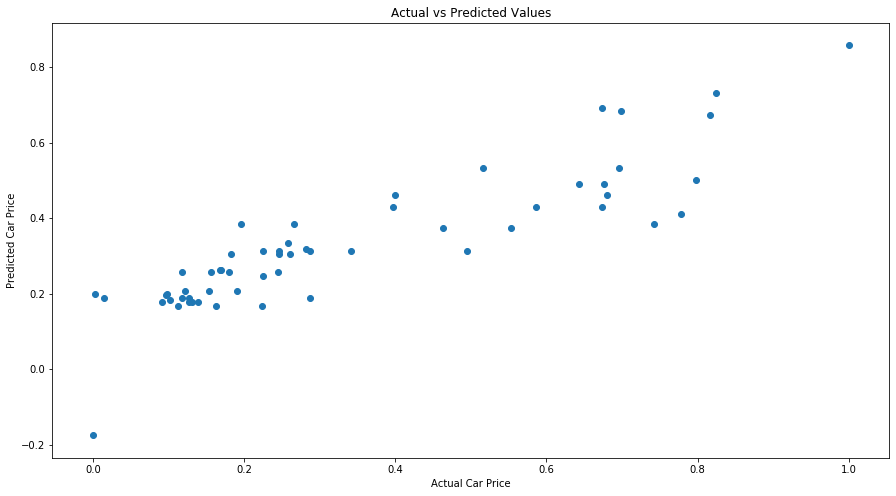

In [221]:
# Plotting y_test and y_pred to understand the spread

plt.figure(figsize = (15, 8))
plt.scatter(y_test, y_pred)           
plt.xlabel('Actual Car Price')             
plt.ylabel('Predicted Car Price')
plt.title('Actual vs Predicted Values')
plt.show()

## R-squared score on the test dataset

In [222]:
r2_score(y_test, y_pred)

0.7273198813720771

### R-squared scores:
- R-squared score on the **training** data : <font color='red'>0.884</font>
- R-squared score on the **testing** data : <font color='red'>0.727</font>